In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

installing all the required library content so we can use it when we need it...!!!

In [6]:
df=pd.read_csv(r"C:\Users\Ravi\Desktop\final Project\PRCP-1000-ProtugeseBank\bank-additional-full 18 jan.csv")

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Read the data and getthering all the dataset and data frame.....!!!

# 1.1 Defind the null value in the data.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

here we can see that in our dataset we are not defind the any null value. that we can see.

In [16]:
# To check if we have any null values using below code for better clarification.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
# Finding the unique values of y
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
# how many people(client) have subscribed to a term deposit?    
df.y.value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

here we can see that 
Y column no: 36548 and yes is 4640 result 

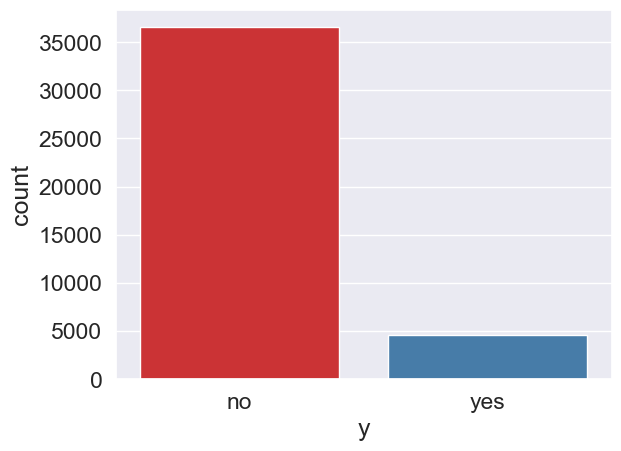

In [19]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=df, palette ='Set1')
plt.show()

we can see it clearly NO value is more than its value significantly more...!!!

# 1.2 Now we can check the duplicate value in the dataset and if we have any we will remove the duplicate values...!!!

In [20]:
# checking for duplicate values
df.duplicated().sum()

12

In [21]:
# Removing Duplicate Values
df = df.drop_duplicates()

In [22]:
# how many people(client) have subscribed to a term deposit?    
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

here we can see that now we having 12 duplicate values in dataset so we can remove it to get no duplicate dataset...!!!

# 1.3 Defind the missing value in the data which is mostly here used as Unknown so we defind it and drop it.

In [23]:
print("# Missing value 'job' variable: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing value 'day_of_week' variable: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing value 'job' variable: 330
# Missing value 'marital' variable: 80
# Missing value 'education' variable: 1730
# Missing value 'default' variable: 8596
# Missing value 'housing' variable: 990
# Missing value 'loan' variable: 990
# Missing value 'contact' variable: 0
# Missing value 'month' variable: 0
# Missing value 'day_of_week' variable: 0
# Missing value 'poutcome' variable: 0


In [24]:
df[df['marital'] == "unknown"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,366,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,253,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,673,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,155,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,617,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,164,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,157,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,977,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,173,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [25]:
# dropping the martial status which is unknown from our dataframe
df.drop(df[df['marital'] == "unknown"].index, inplace=True)

C:\Users\Ravi\AppData\Local\Temp\ipykernel_8380\611502539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['marital'] == "unknown"].index, inplace=True)


here we having 80 unknown values in marital status and we cant defind the value as person is married single or divorced so we drop the marital column as it wont effect the dataframe.

In [26]:
df.shape

(41096, 21)

In [27]:
df[df['default'] == "yes"].shape

(3, 21)

In [28]:
df.education.value_counts() 

university.degree      12133
high.school             9498
basic.9y                6037
professional.course     5234
basic.4y                4170
basic.6y                2285
unknown                 1721
illiterate                18
Name: education, dtype: int64

In [29]:
df.job.value_counts() 

admin.           10405
blue-collar       9239
technician        6727
services          3961
management        2921
retired           1713
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
unknown            321
Name: job, dtype: int64

In [30]:
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000
mean,40.023311,258.209899,2.566673,962.514186,0.172815,0.082512,93.575923,-40.502246,3.621894,5167.053638
std,10.420089,259.245306,2.767906,186.816397,0.494837,1.570683,0.578727,4.627021,1.734266,72.255185
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 1.4 here some information we can get from the dataframe are as under.
1. average age of data frame is 40 years 
2. call duration which effect the data have zero time duration so we need to get some option for that.
3. average campaign size is very less than the max size of campaign 
4. according to age data we can see that our clients are adults only


# 2.0 Data Analysis

# 2.1 Checking the ourliers in Our Dataset with help of Box Plot

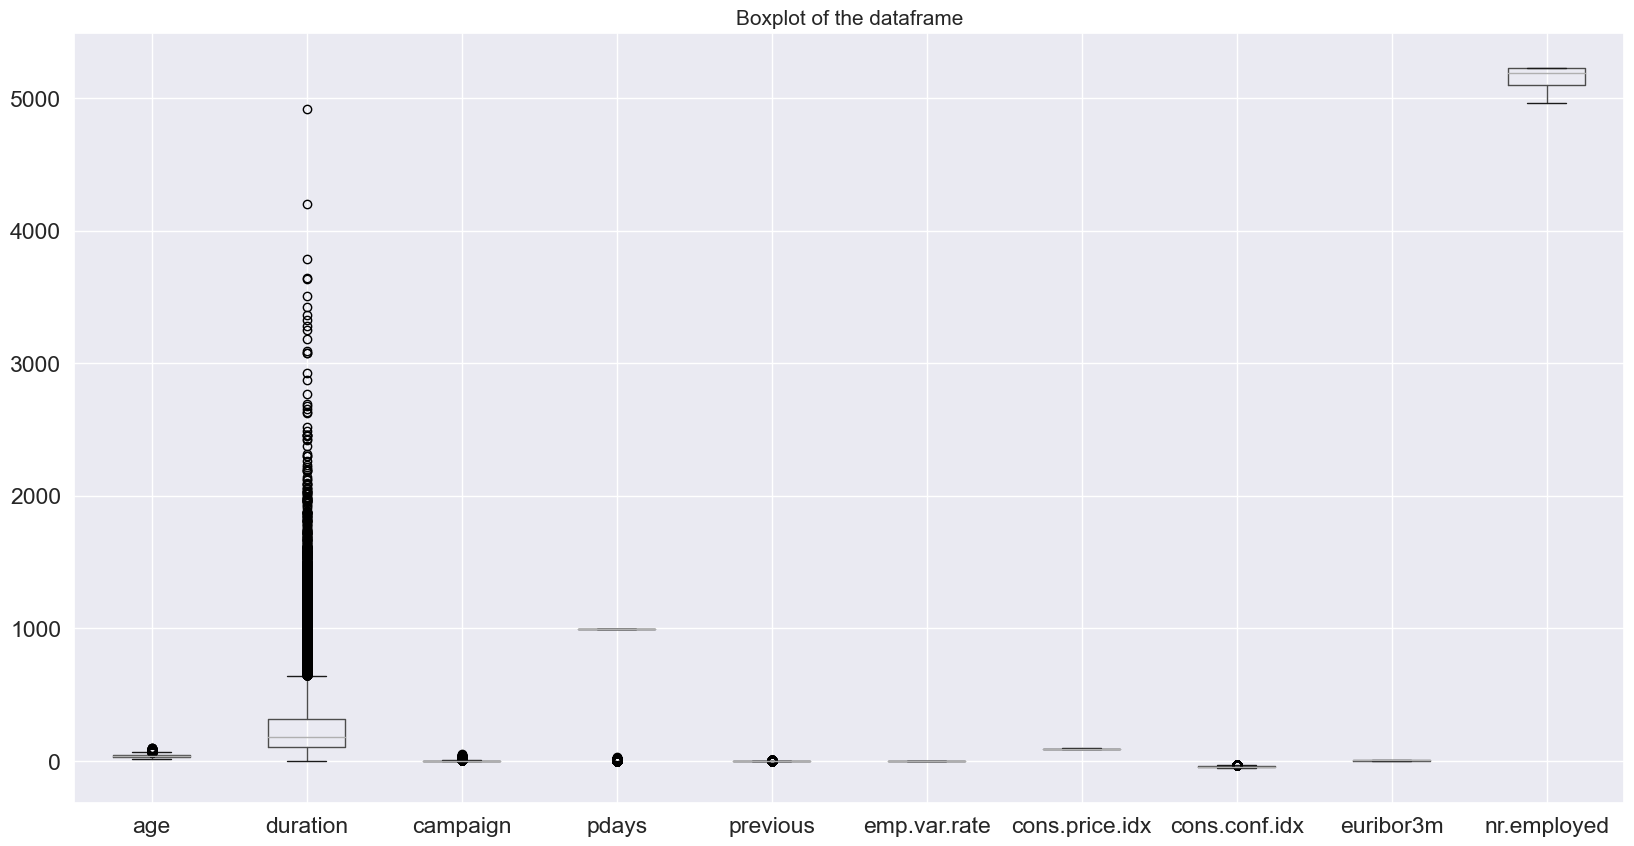

In [31]:
# checking for outliers in dataset
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

here we can see that in duration we are having the most outliers as its in minutes not in sec. also we find the some outliers in age and campaign so we need to plot individual plotting to understand it.

# 2.2 individual plotting for good perception of all the dataset.

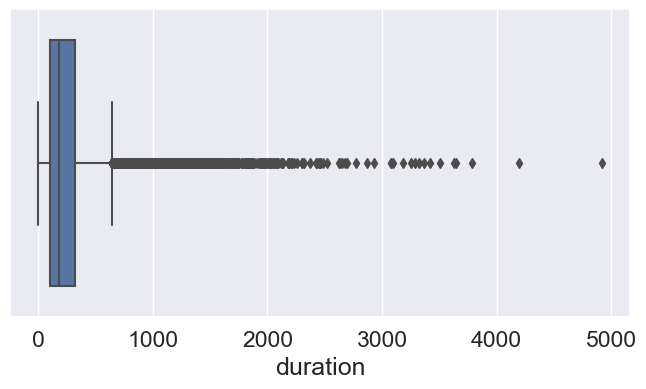

In [32]:
# looking inside duration variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

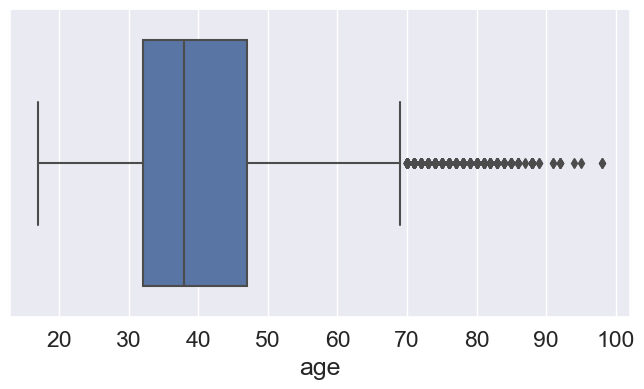

In [33]:
# looking inside age variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

<Axes: xlabel='y', ylabel='age'>

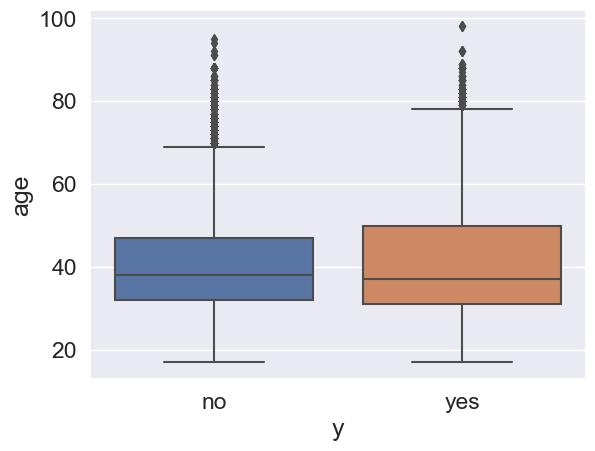

In [34]:
sns.boxplot(x = 'y', y = 'age', data = df)

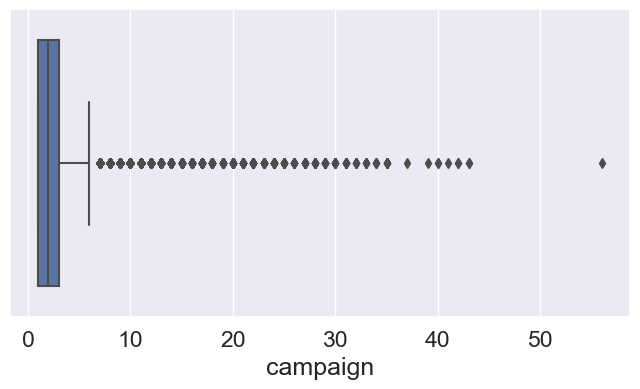

In [35]:
# looking inside campaign variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'])
plt.show()

<Axes: xlabel='y', ylabel='campaign'>

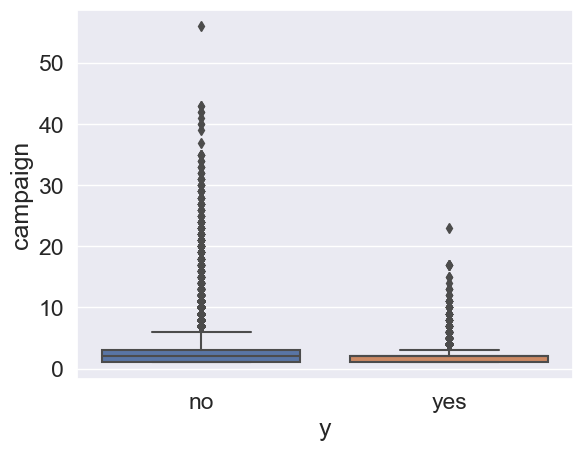

In [36]:
sns.boxplot(x = 'y', y = 'campaign', data = df)

In [37]:
Q1_d = df['duration'].quantile(.25)
Q3_d = df['duration'].quantile(.75)
Q1_a = df['age'].quantile(.25)
Q3_a = df['age'].quantile(.75)
Q1_c = df['campaign'].quantile(.25)
Q3_c = df['campaign'].quantile(.75)

In [38]:
IQR_d = Q3_d - Q1_d
IQR_a = Q3_a - Q1_a
IQR_c = Q3_c - Q1_c

In [39]:
print(IQR_d)
print(IQR_a)
print(IQR_c)

217.0
15.0
2.0


In [40]:
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a
lower_c = Q1_c - 1.5 * IQR_d
upper_c = Q3_c + 1.5 * IQR_d

In [41]:
print(lower_d,upper_d)
print(lower_a,upper_a)
print(lower_c,upper_c)

-223.5 644.5
9.5 69.5
-324.5 328.5


Duration <- Above 644.5 second is outliers for duration

Age <- Above 69.5 years is outliers

campaign <- above 328.5 is outliers

In [42]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['duration'] >= lower_d] 
df_out= df[df['duration'] <= upper_d] 

In [43]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['age'] >= lower_a] 
df_out= df[df['age'] <= upper_a] 

In [44]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['campaign'] >= lower_c] 
df_out= df[df['campaign'] <= upper_c] 

In [45]:
df_out.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000
mean,40.023311,258.209899,2.566673,962.514186,0.172815,0.082512,93.575923,-40.502246,3.621894,5167.053638
std,10.420089,259.245306,2.767906,186.816397,0.494837,1.570683,0.578727,4.627021,1.734266,72.255185
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Correlation table and Heat map of numerical features

In [47]:
# Calculating correlation
corr_matrix = df.corr()
print(corr_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.001414  0.004117 -0.035040  0.024821   
duration       -0.001414  1.000000 -0.071767 -0.047526  0.020336   
campaign        0.004117 -0.071767  1.000000  0.052477 -0.079105   
pdays          -0.035040 -0.047526  0.052477  1.000000 -0.587662   
previous        0.024821  0.020336 -0.079105 -0.587662  1.000000   
emp.var.rate   -0.000642 -0.027923  0.150454  0.271068 -0.420431   
cons.price.idx  0.000665  0.005598  0.127120  0.078883 -0.202701   
cons.conf.idx   0.129279 -0.008223 -0.013610 -0.091437 -0.051025   
euribor3m       0.010417 -0.032824  0.134818  0.296796 -0.454390   
nr.employed    -0.018144 -0.044734  0.143812  0.372446 -0.501320   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000642        0.000665       0.129279   0.010417   
duration           -0.027923        0.005598      -0.008223  -0.032824   
campaign            0.150454 

C:\Users\Ravi\AppData\Local\Temp\ipykernel_8380\1848325919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


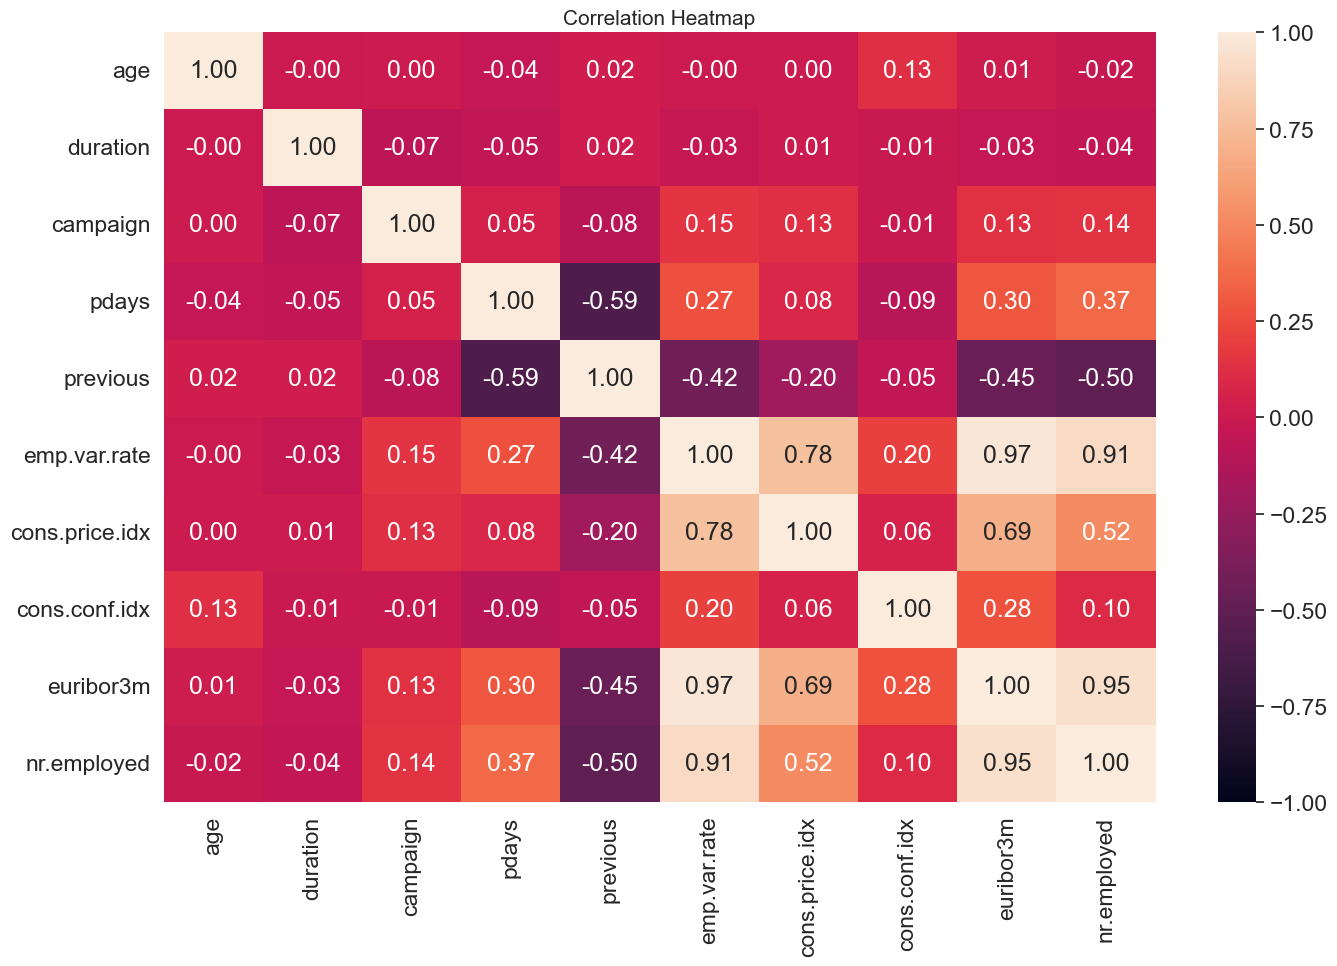

In [48]:
# Creating correlation heat map.
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

From the above heatmap, we can see that few variables in the dataset are highly correlated.

We see from above that any lightier shade color box except the diagnol shows high positive correlation. We see from above that any darker color box shows high negative correlatio

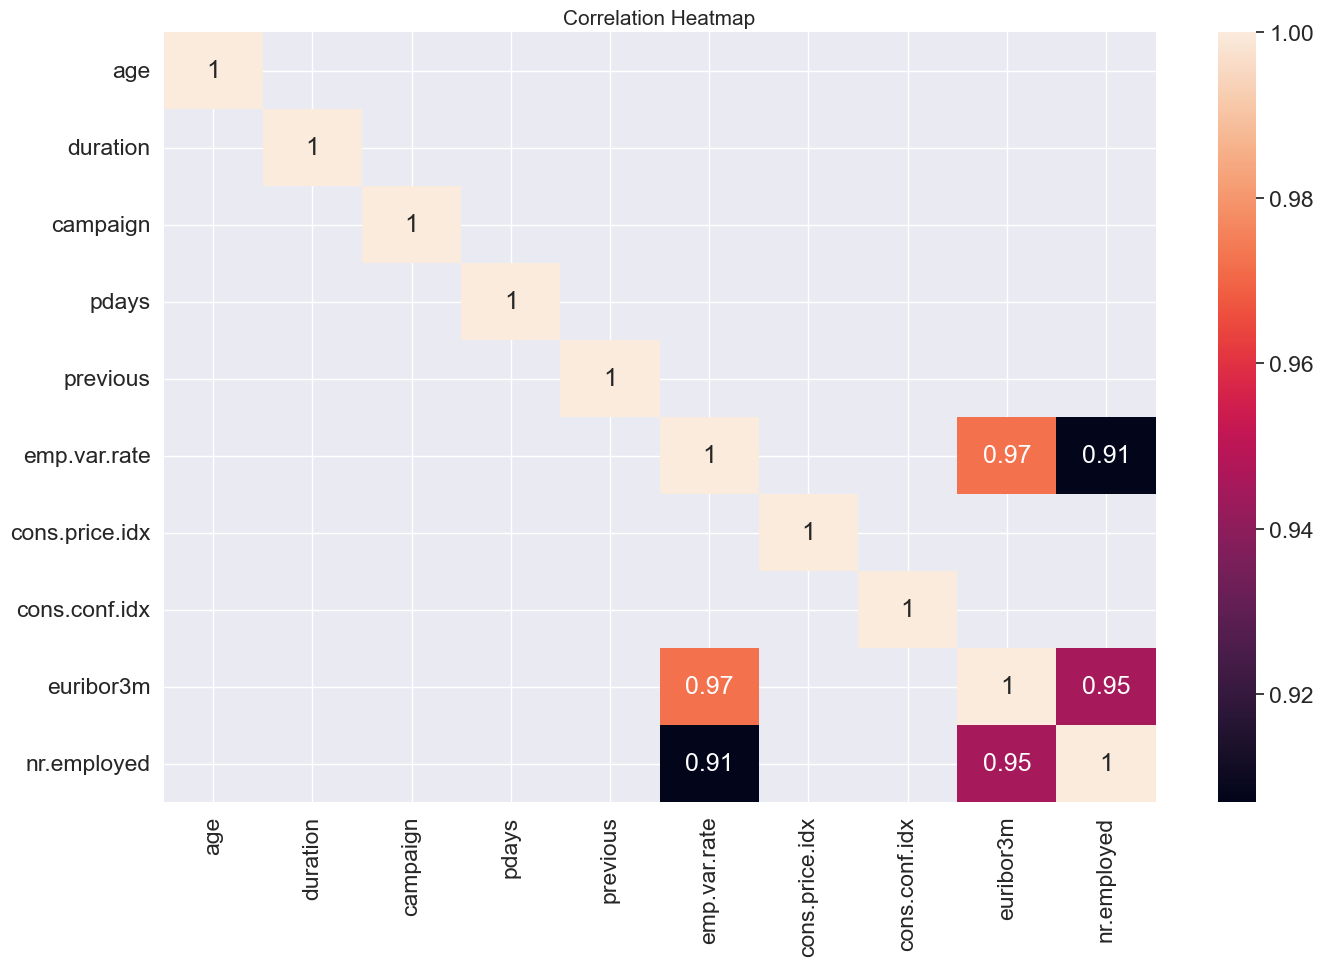

In [49]:
# plotting the heatmap of only highly correlated varibles with threshold value 0.9
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.9], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

There are 3 variables which are largely correlated to each other, we are assuming a threshold as 0.9, the value greater then this threshold is assumed to be highly correlated. For instance, euribor3m, nr.employed, emp.var.rate all have correlation values greater than threshold value(0.9).

In [50]:
# changing yes to 1 and no to 0
df['y'] = (df['y']=='yes').astype(int) 

C:\Users\Ravi\AppData\Local\Temp\ipykernel_8380\2633233514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = (df['y']=='yes').astype(int)


In [51]:
df.y.value_counts() 

0    36469
1     4627
Name: y, dtype: int64

Distribution plot for age column to see which age group have subscribe the term deposit

C:\Users\Ravi\AppData\Local\Temp\ipykernel_8380\1160328333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'green')


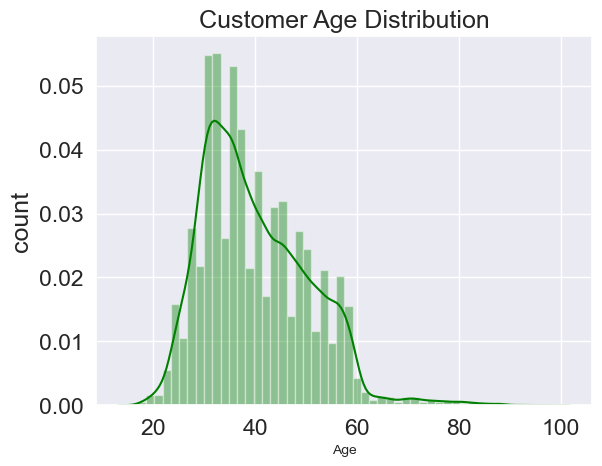

In [52]:
sns.distplot(df['age'], color = 'green')
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('count')
plt.show()

Text(0.5, 0, 'age')

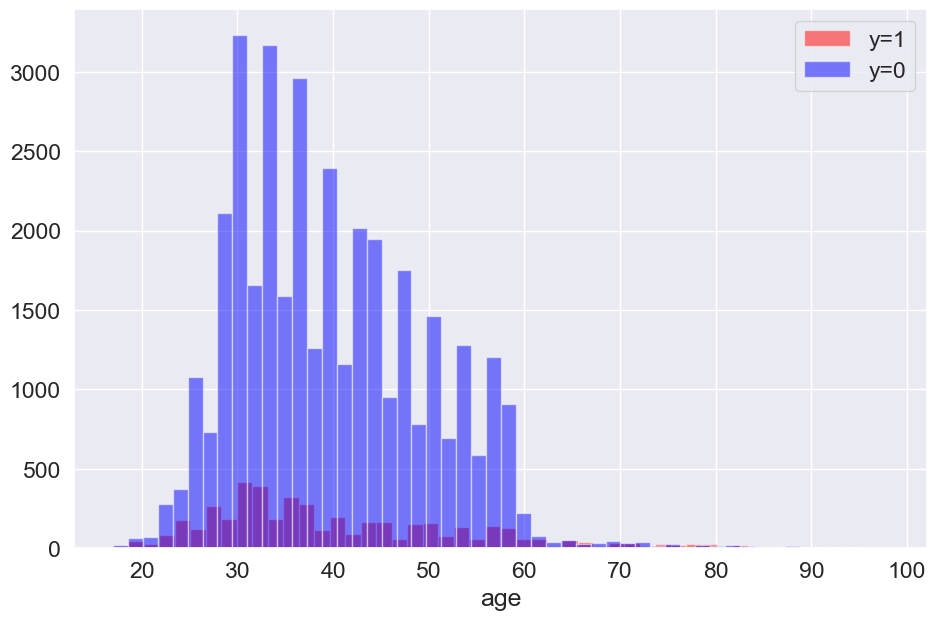

In [53]:
plt.figure(figsize=(11,7))
df[df['y']==1]['age'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
df[df['y']==0]['age'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('age')

Text(0.5, 0, 'campaign')

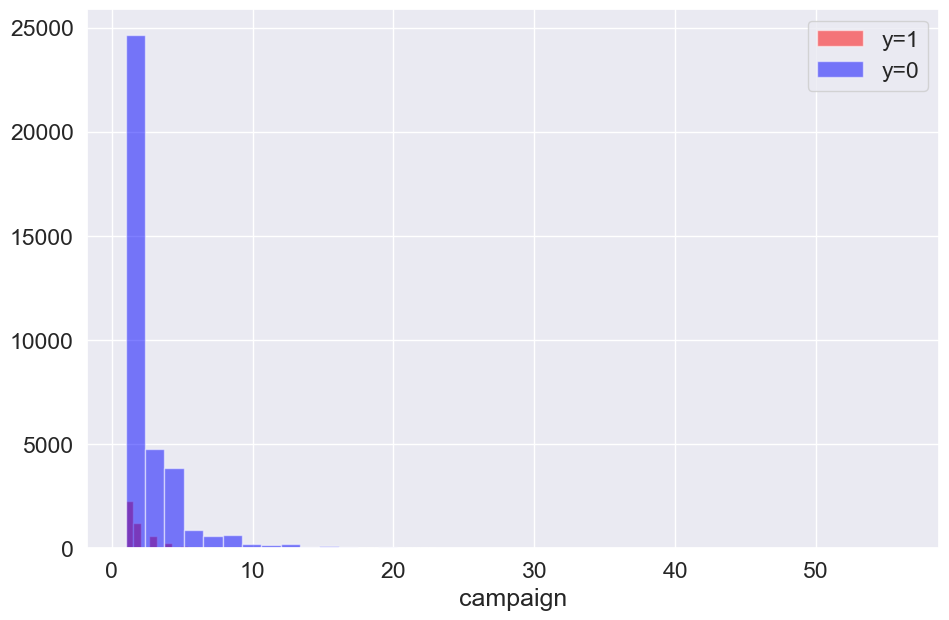

In [54]:
plt.figure(figsize=(11,7))
df[df['y']==1]['campaign'].hist(alpha = 0.5, color = 'red', bins= 40, label='y=1')
df[df['y']==0]['campaign'].hist(alpha =0.5, color = 'blue', bins= 40, label='y=0')
plt.legend()
plt.xlabel('campaign')

Text(0.5, 0, 'duration')

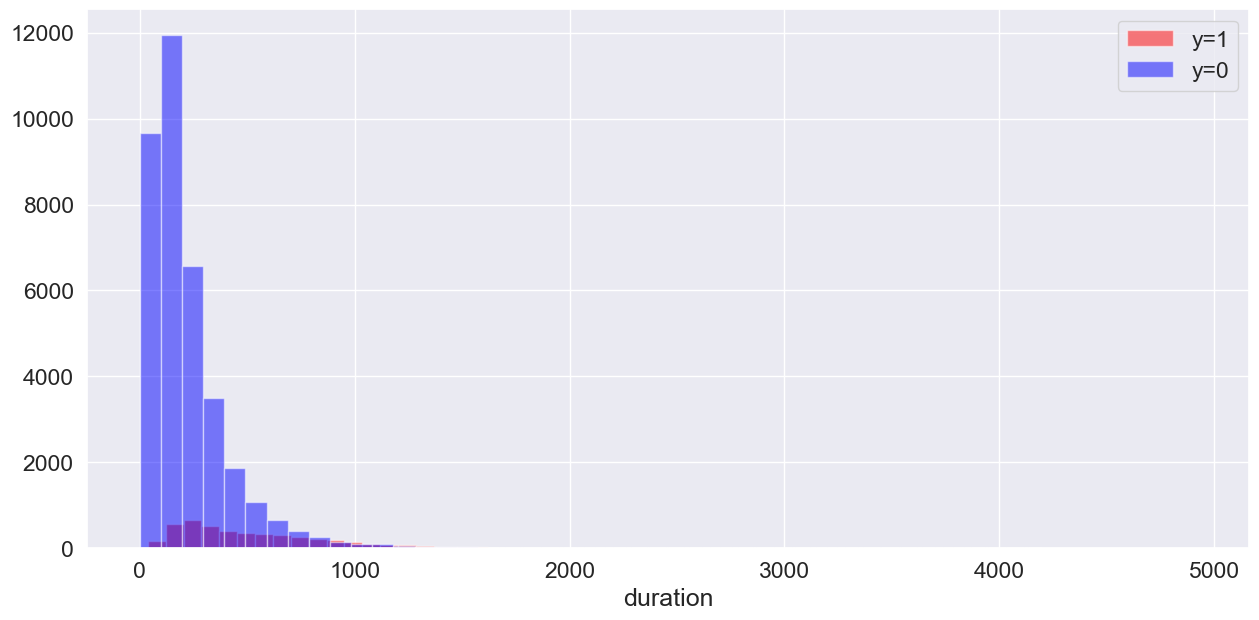

In [55]:
plt.figure(figsize=(15,7))
df[df['y']==1]['duration'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
df[df['y']==0]['duration'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('duration')

# Seing the trend between age and campaign using jointplot

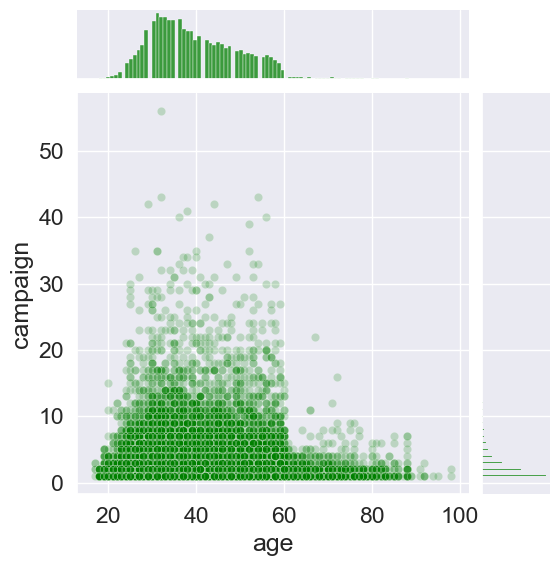

In [56]:
sns.jointplot(x='age', y='campaign', data=df, color = 'green', alpha=0.2)

From above plot we can see campaign was targeted for adult between age 25-45.

<Figure size 1100x700 with 0 Axes>

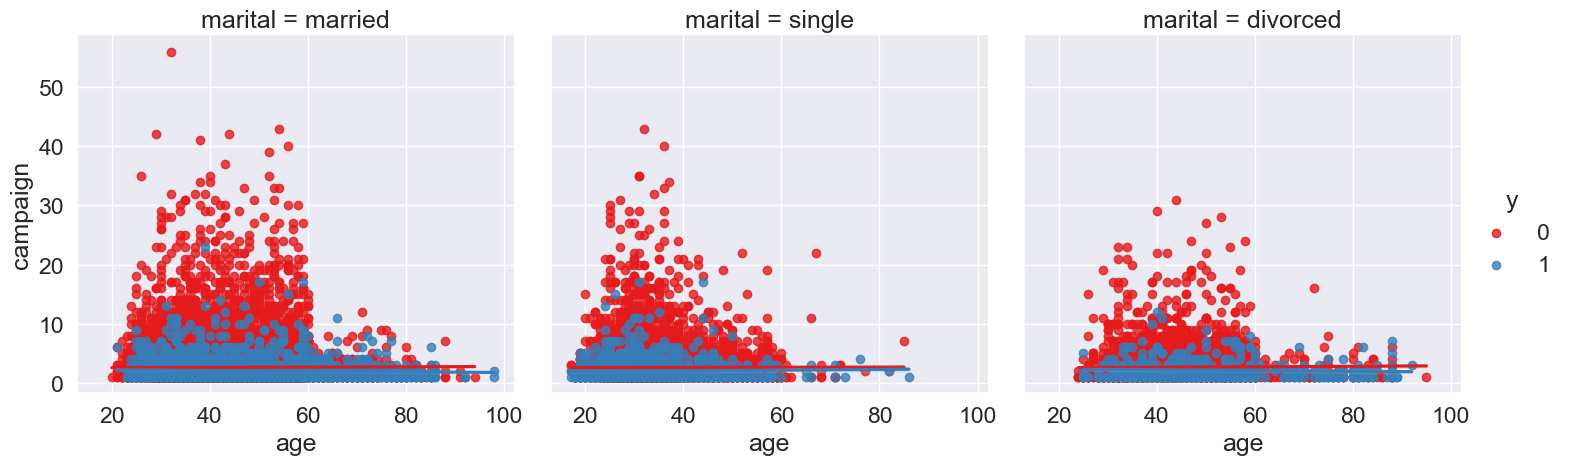

In [57]:
plt.figure(figsize=(11,7))
sns.lmplot(y='campaign',x='age',hue = 'y', data=df,col='marital',palette='Set1')

From above plot, we observe that clients who are married and whose age are in between 25-45 years old are responsive toward term deposit.

C:\Users\Ravi\AppData\Local\Temp\ipykernel_8380\1084326349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['emp.var.rate'])


<Axes: xlabel='emp.var.rate', ylabel='Density'>

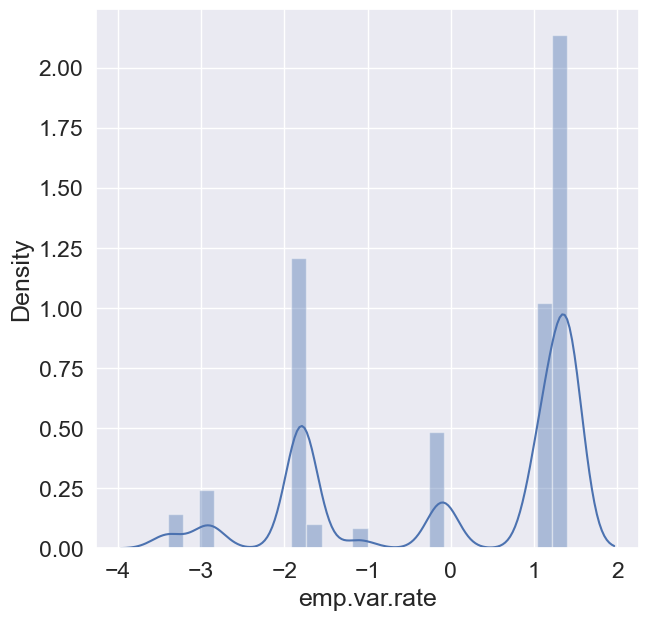

In [58]:
plt.figure(figsize=(7,7))
sns.distplot(df['emp.var.rate'])

We can see there is a high employee variation rate which signifies that they have made the campaign when there were more people taken in because of the economic boom.

# Univariate Analysis of categorical features.

In [60]:
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

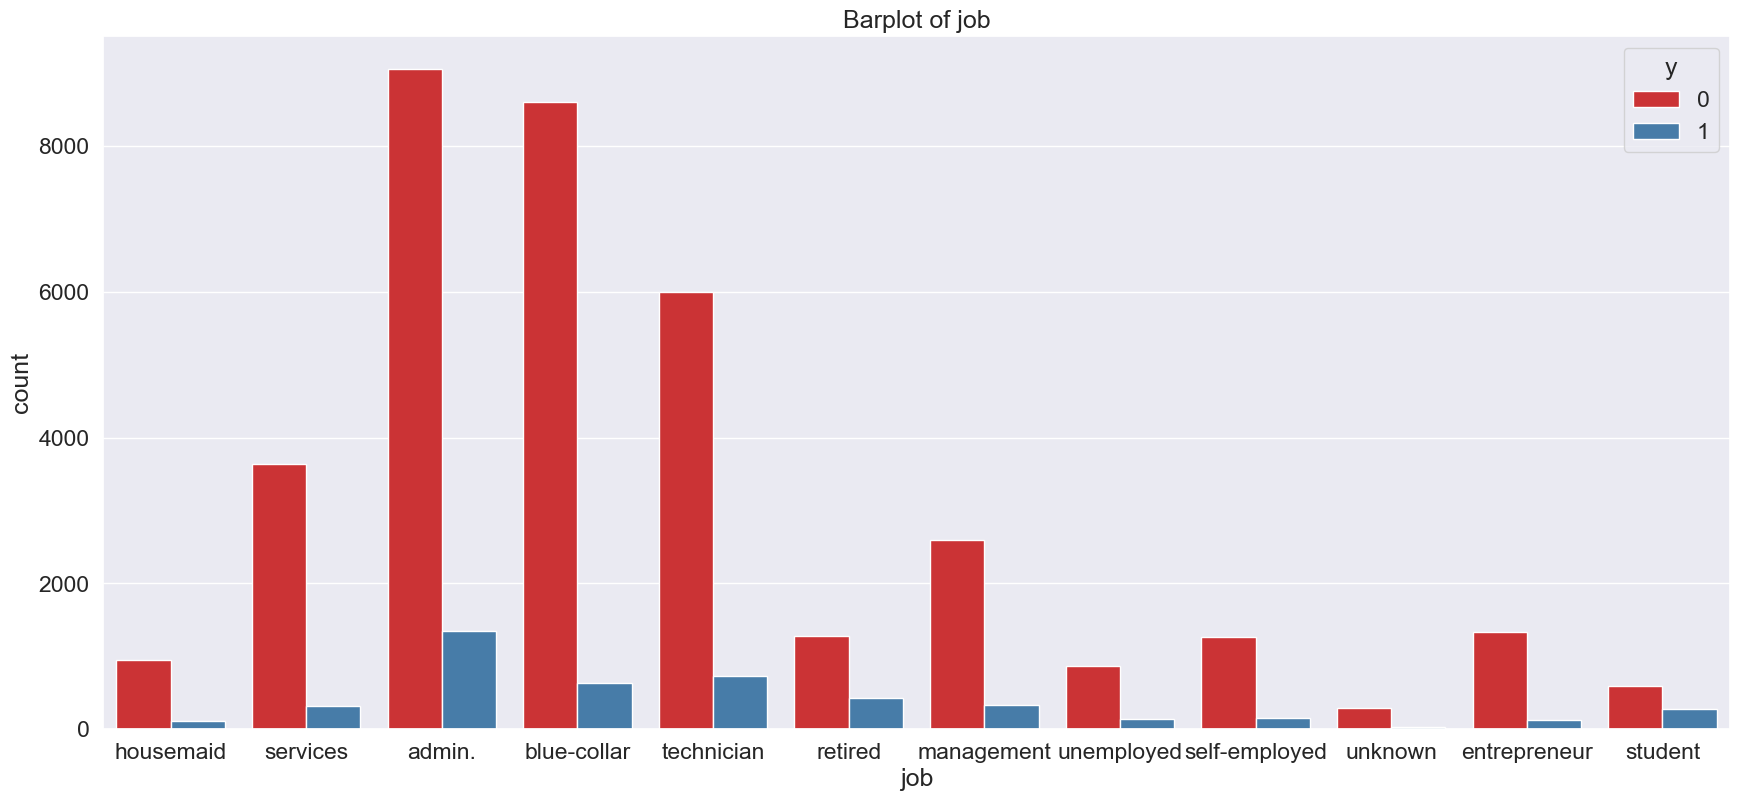

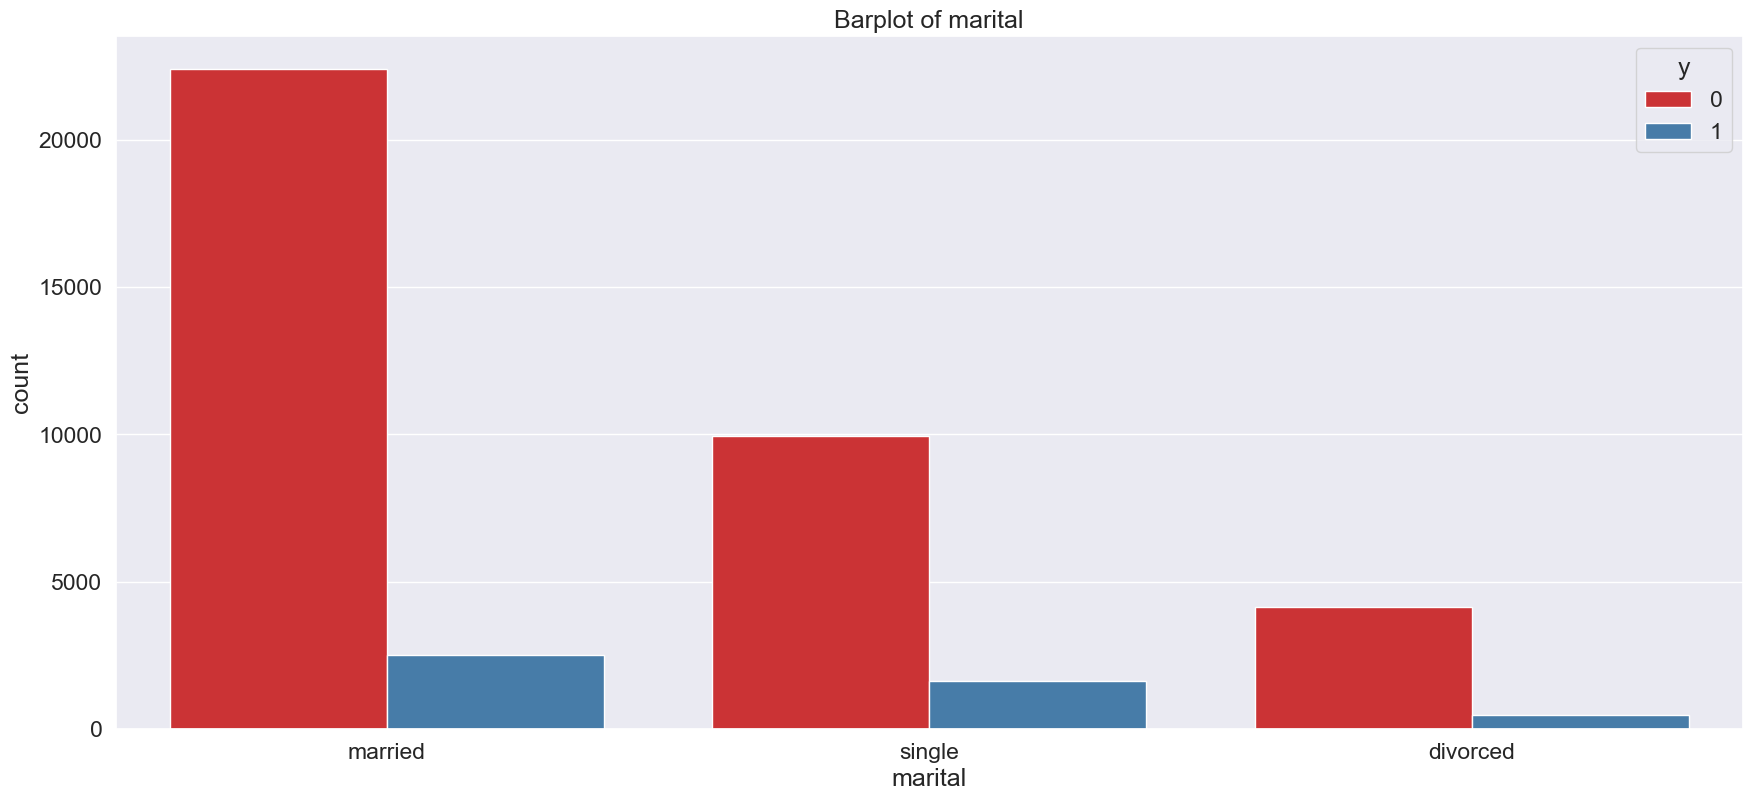

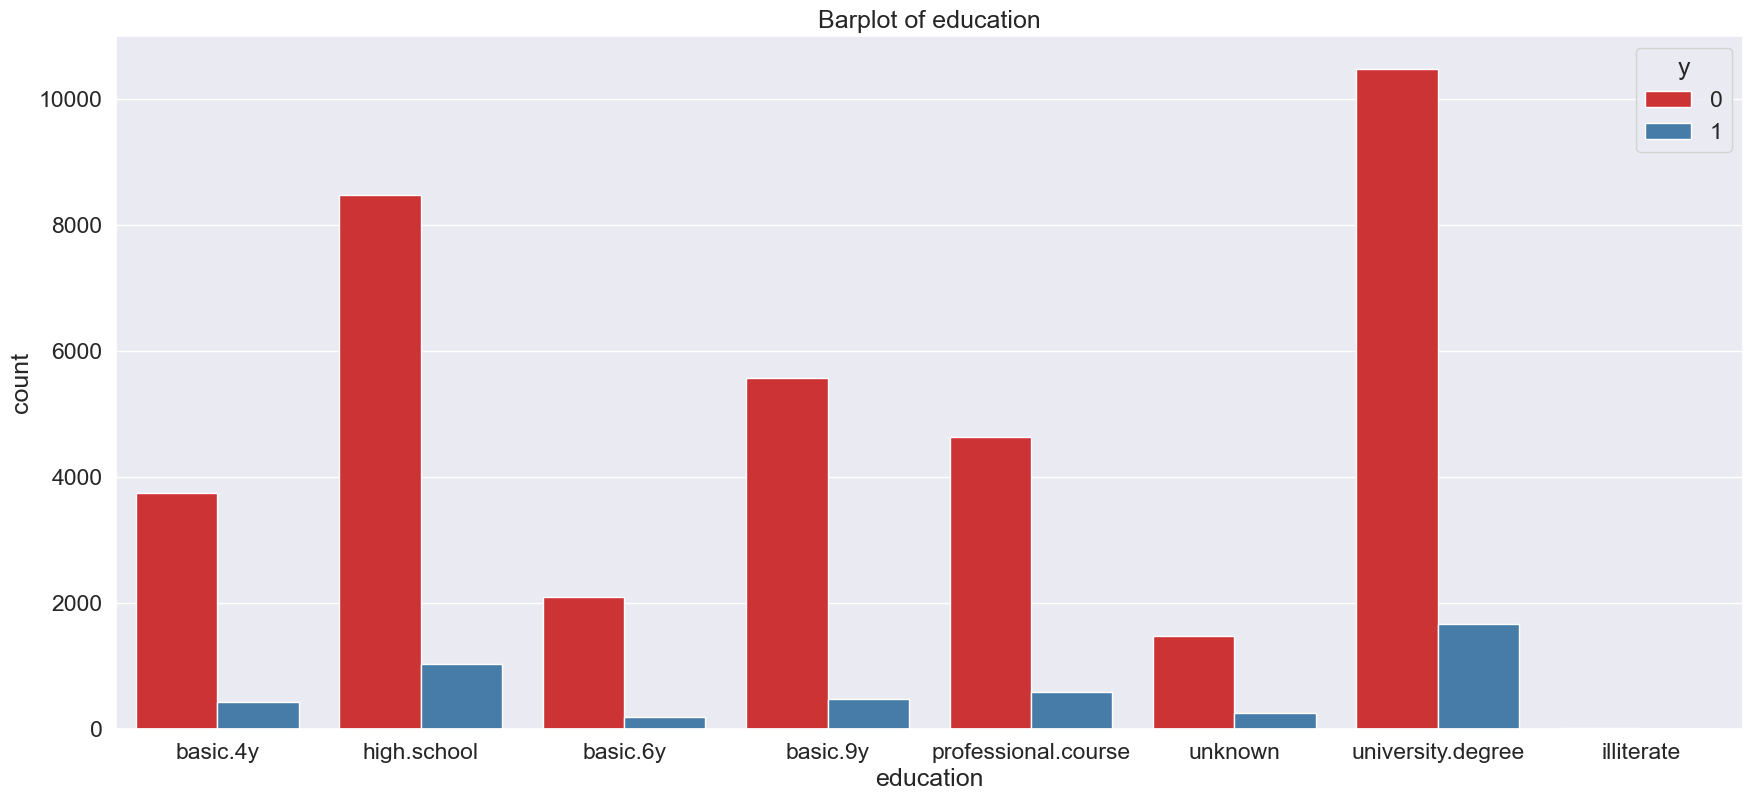

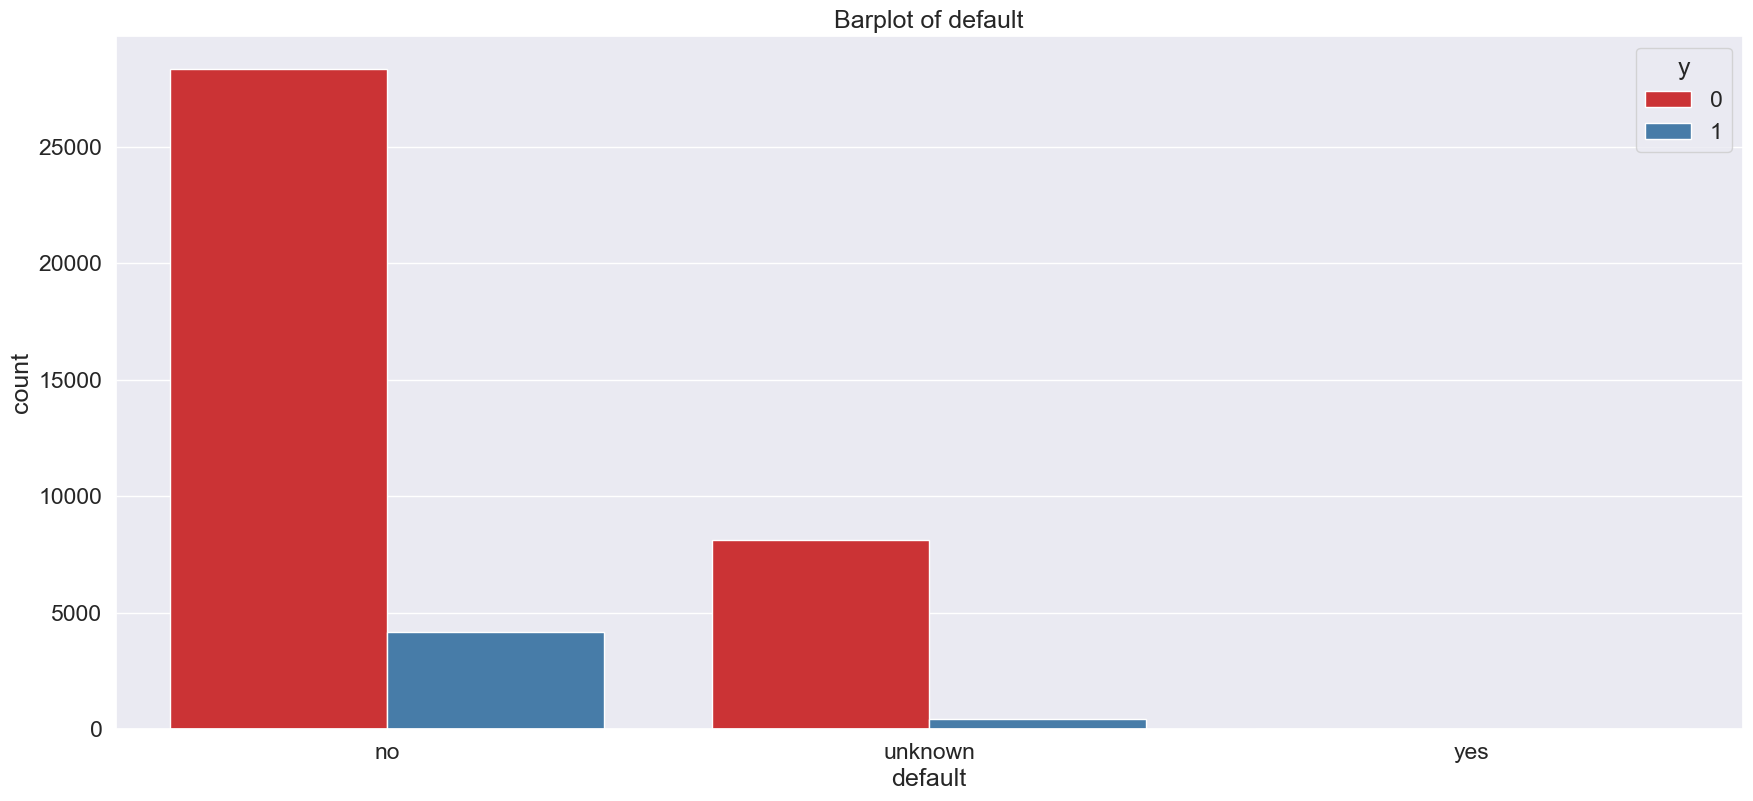

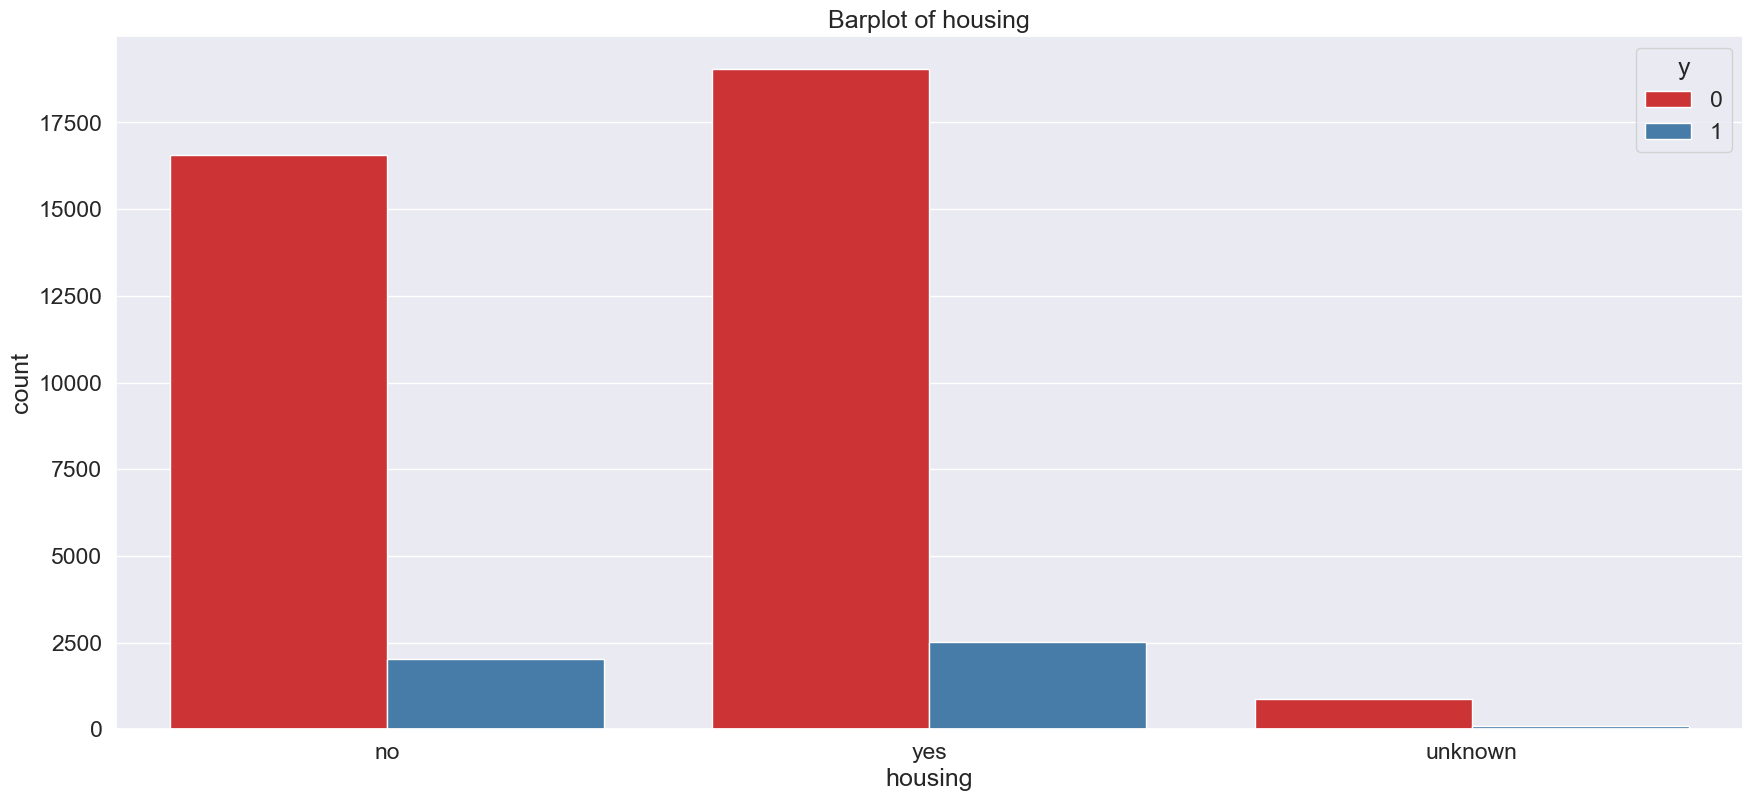

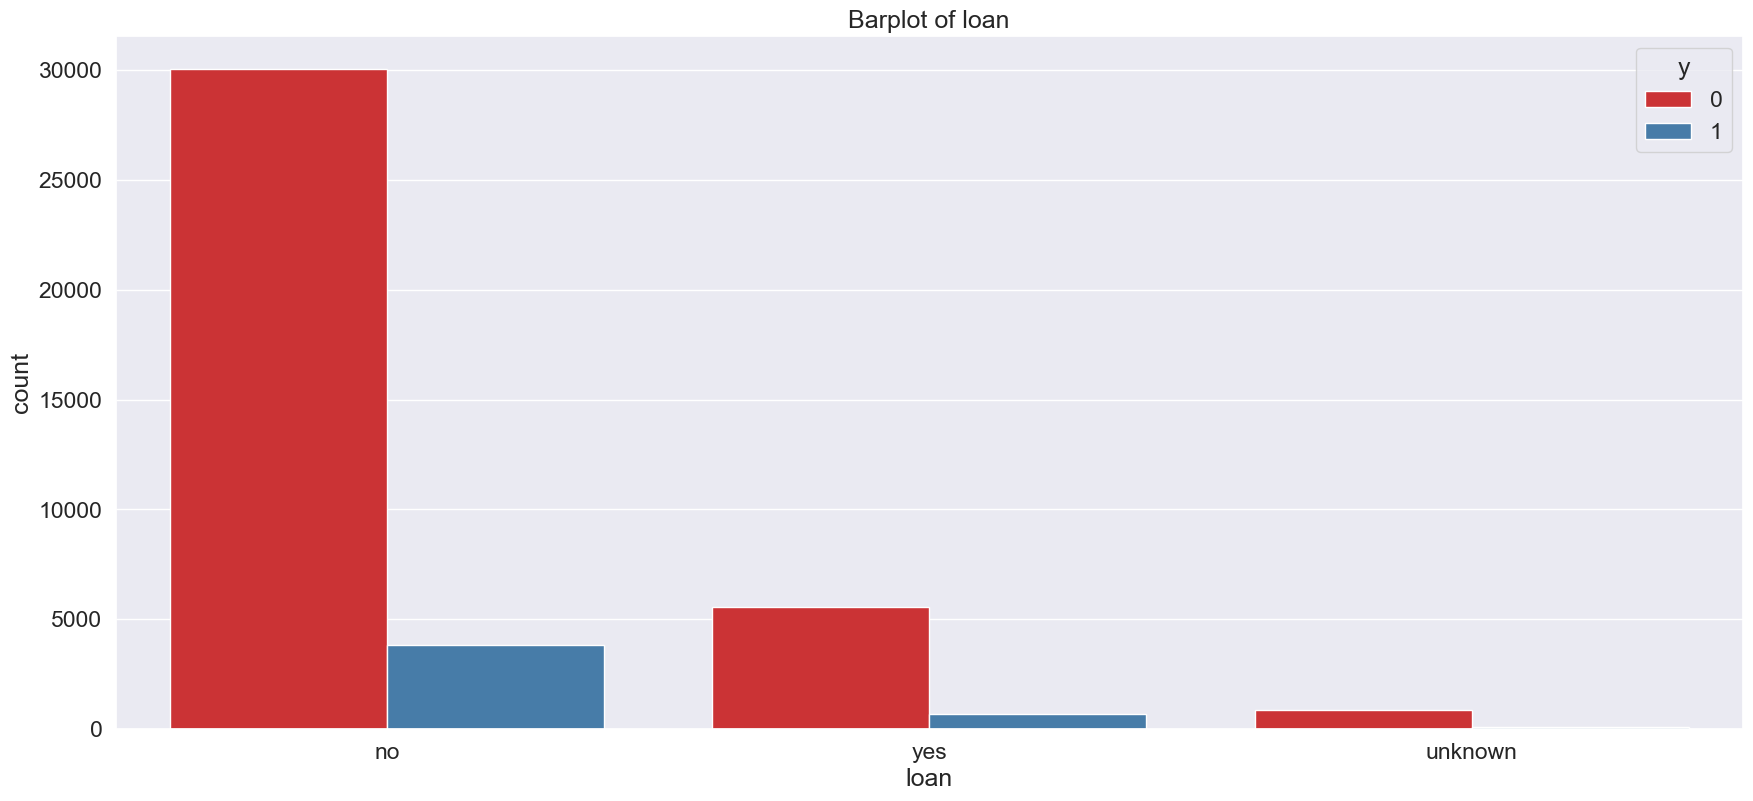

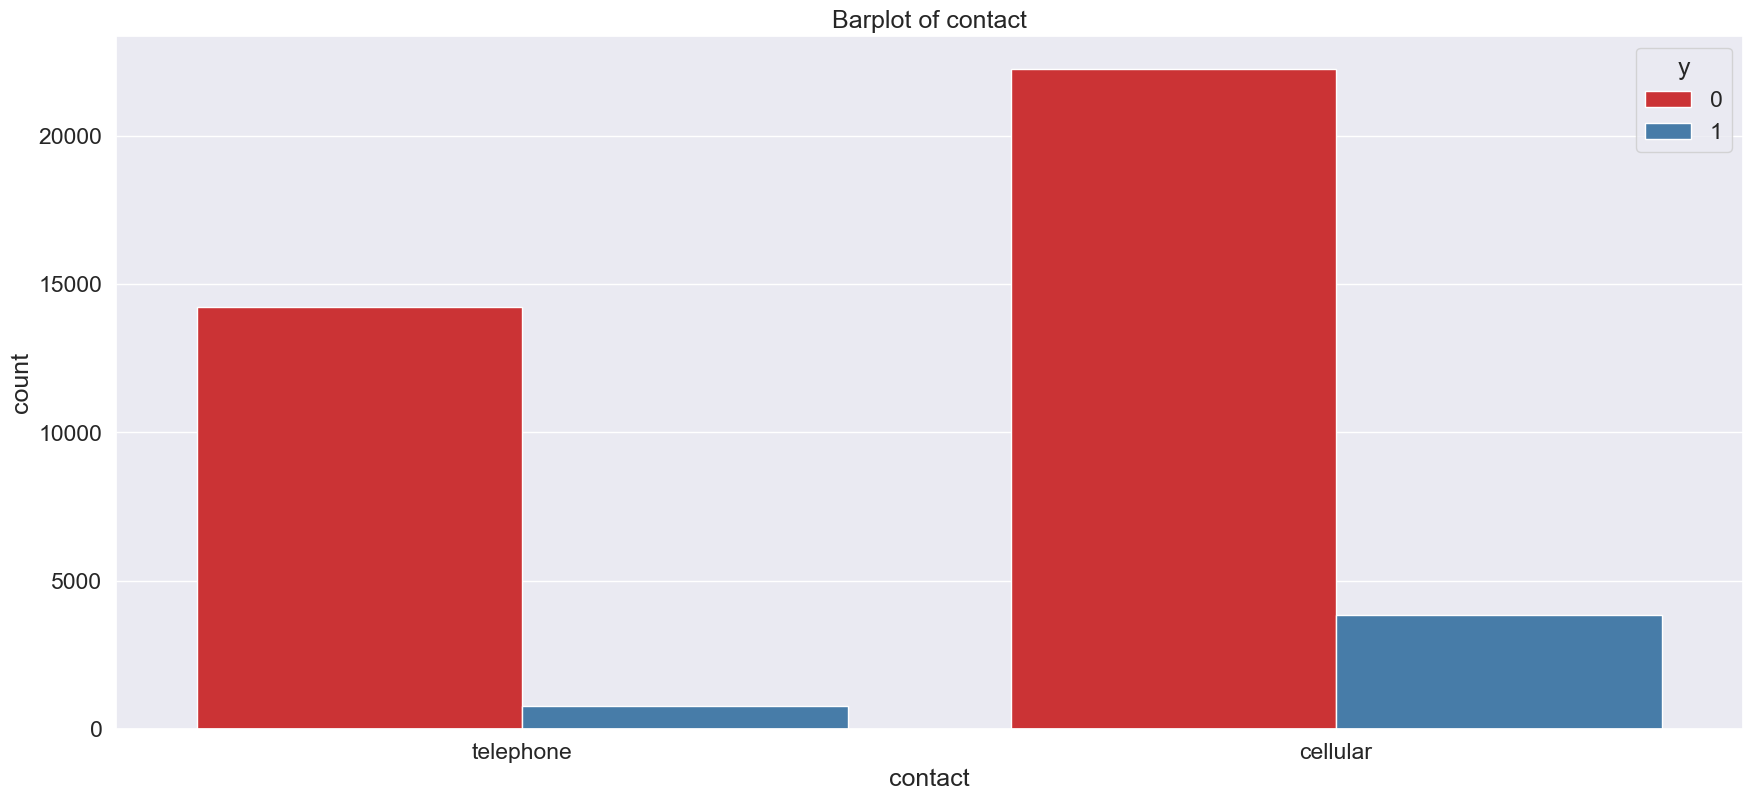

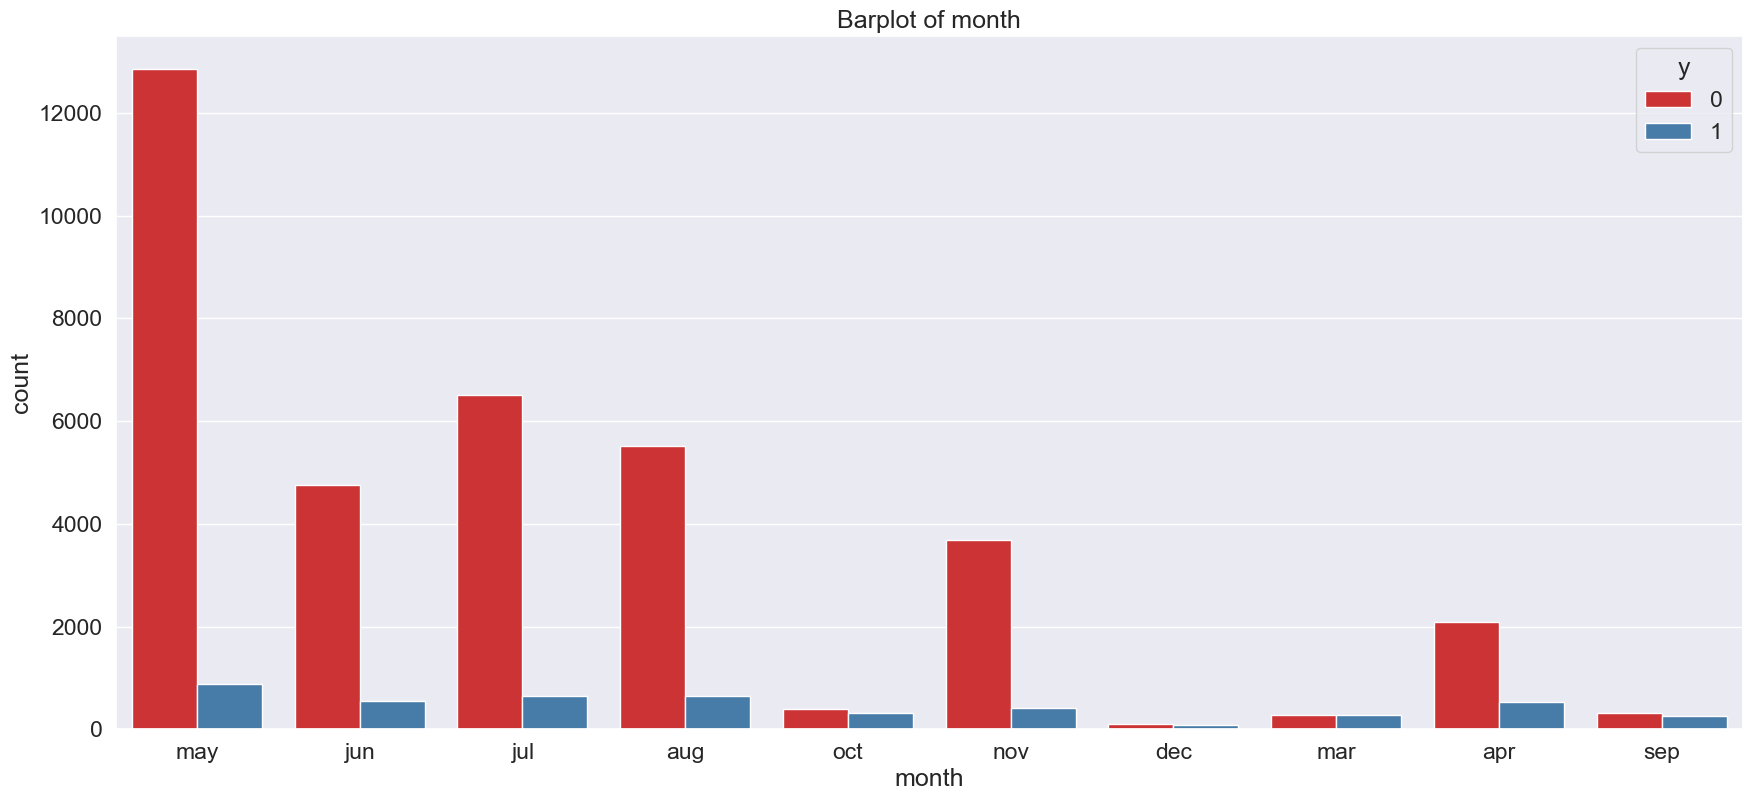

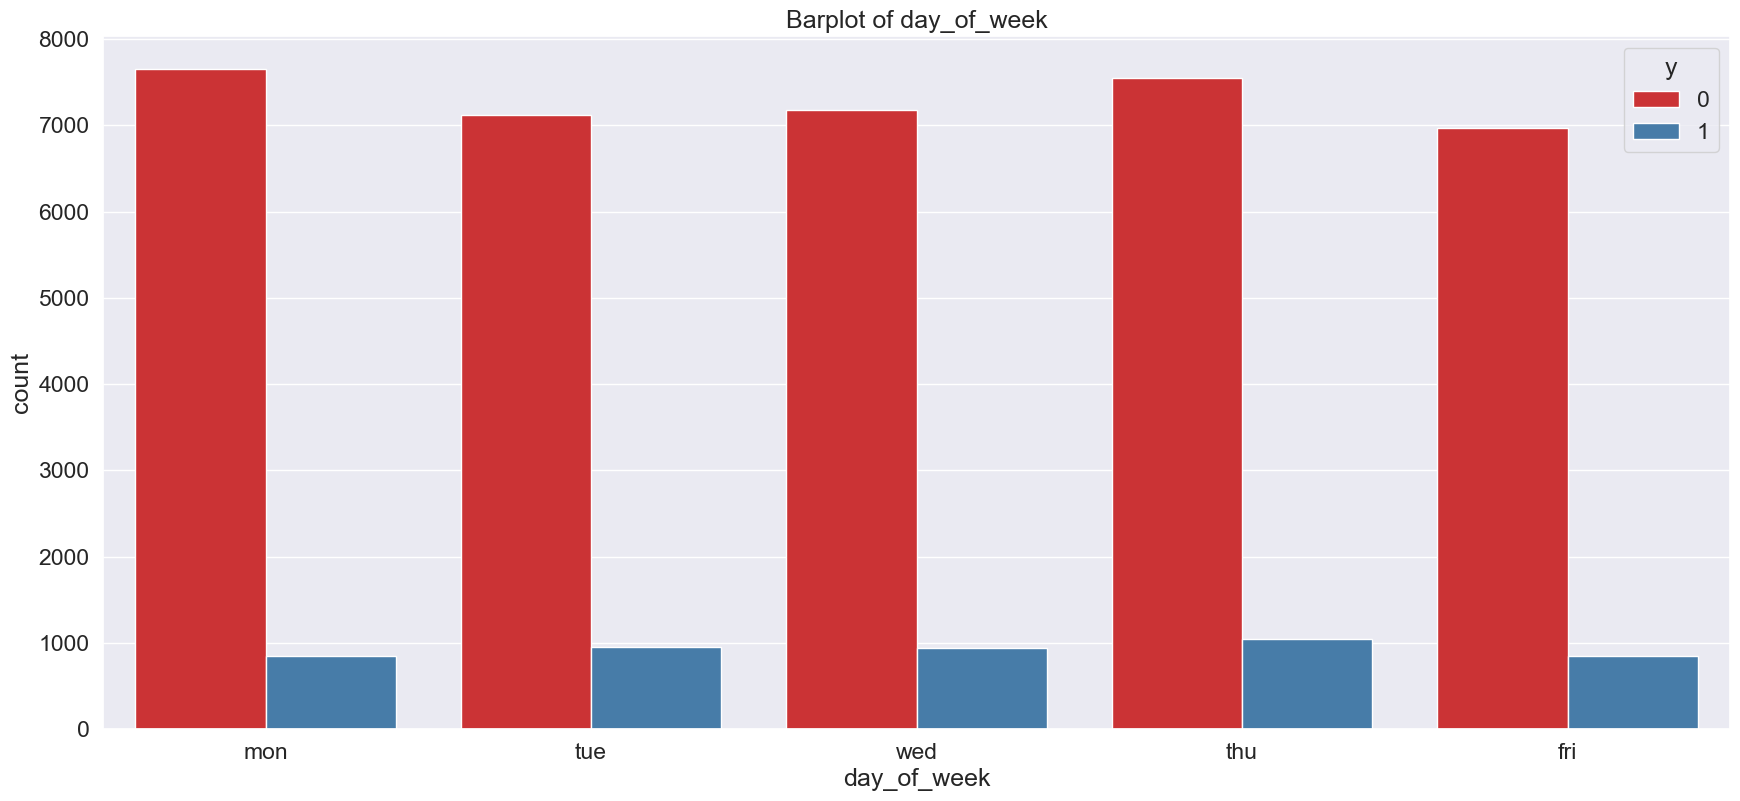

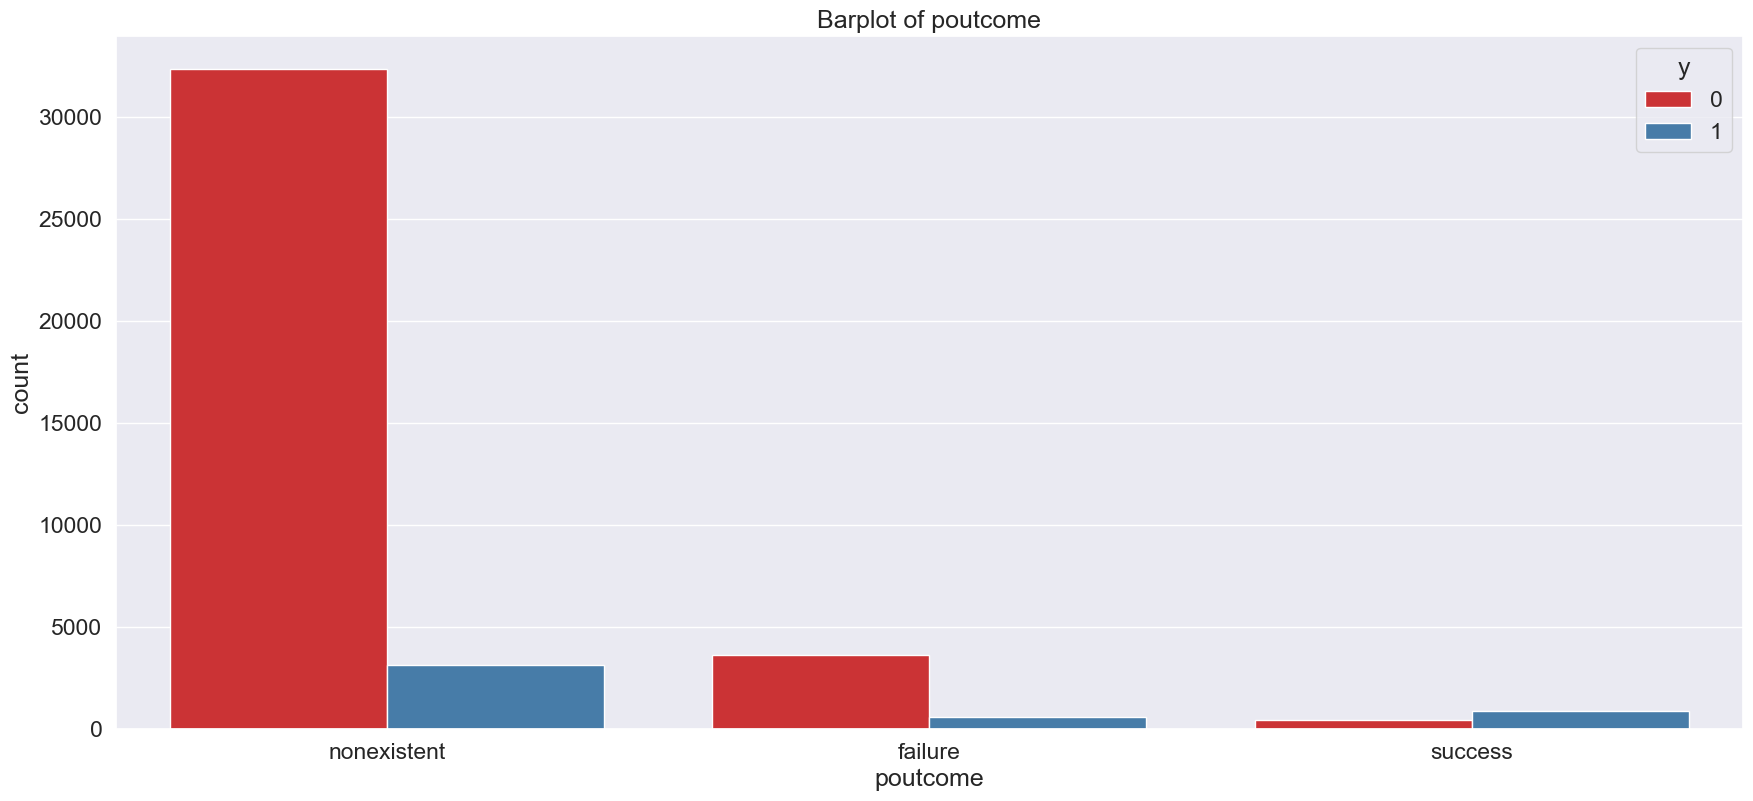

In [61]:
 for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, hue = 'y', palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

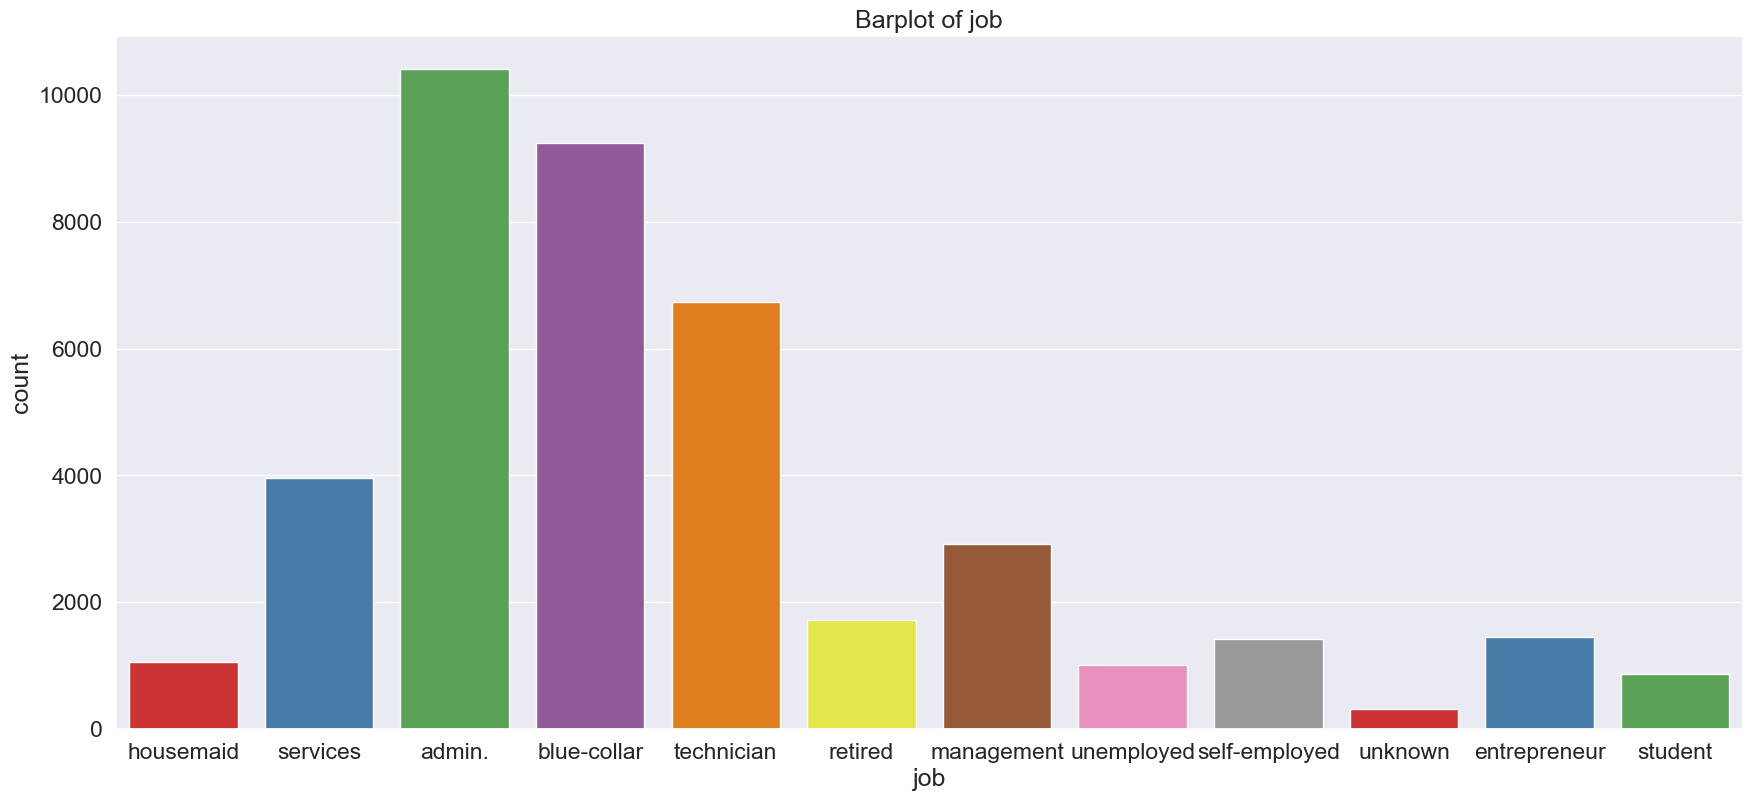

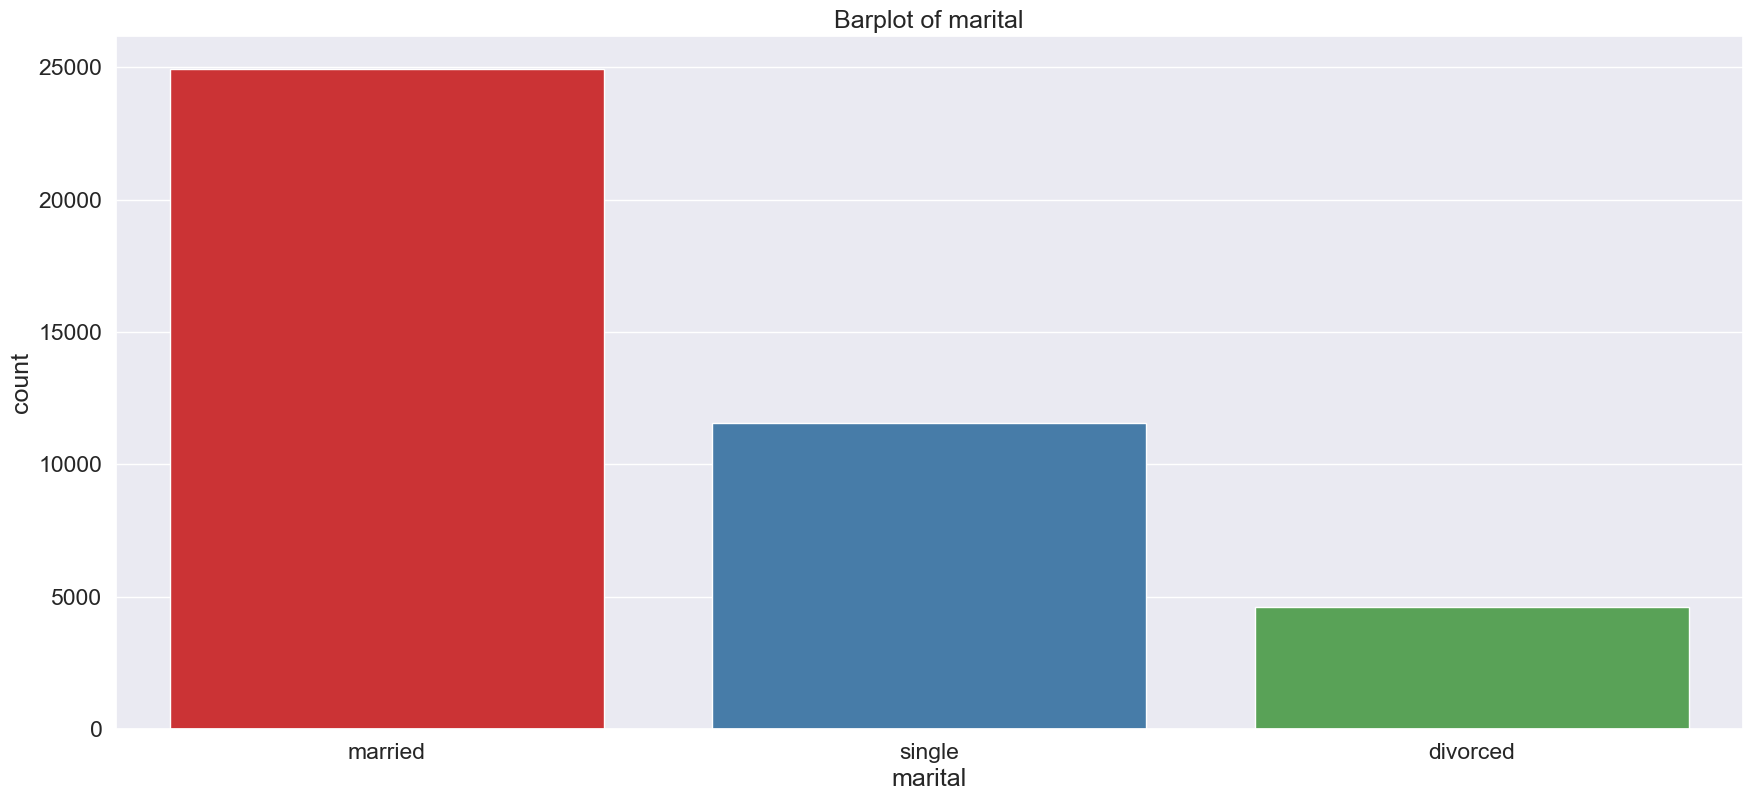

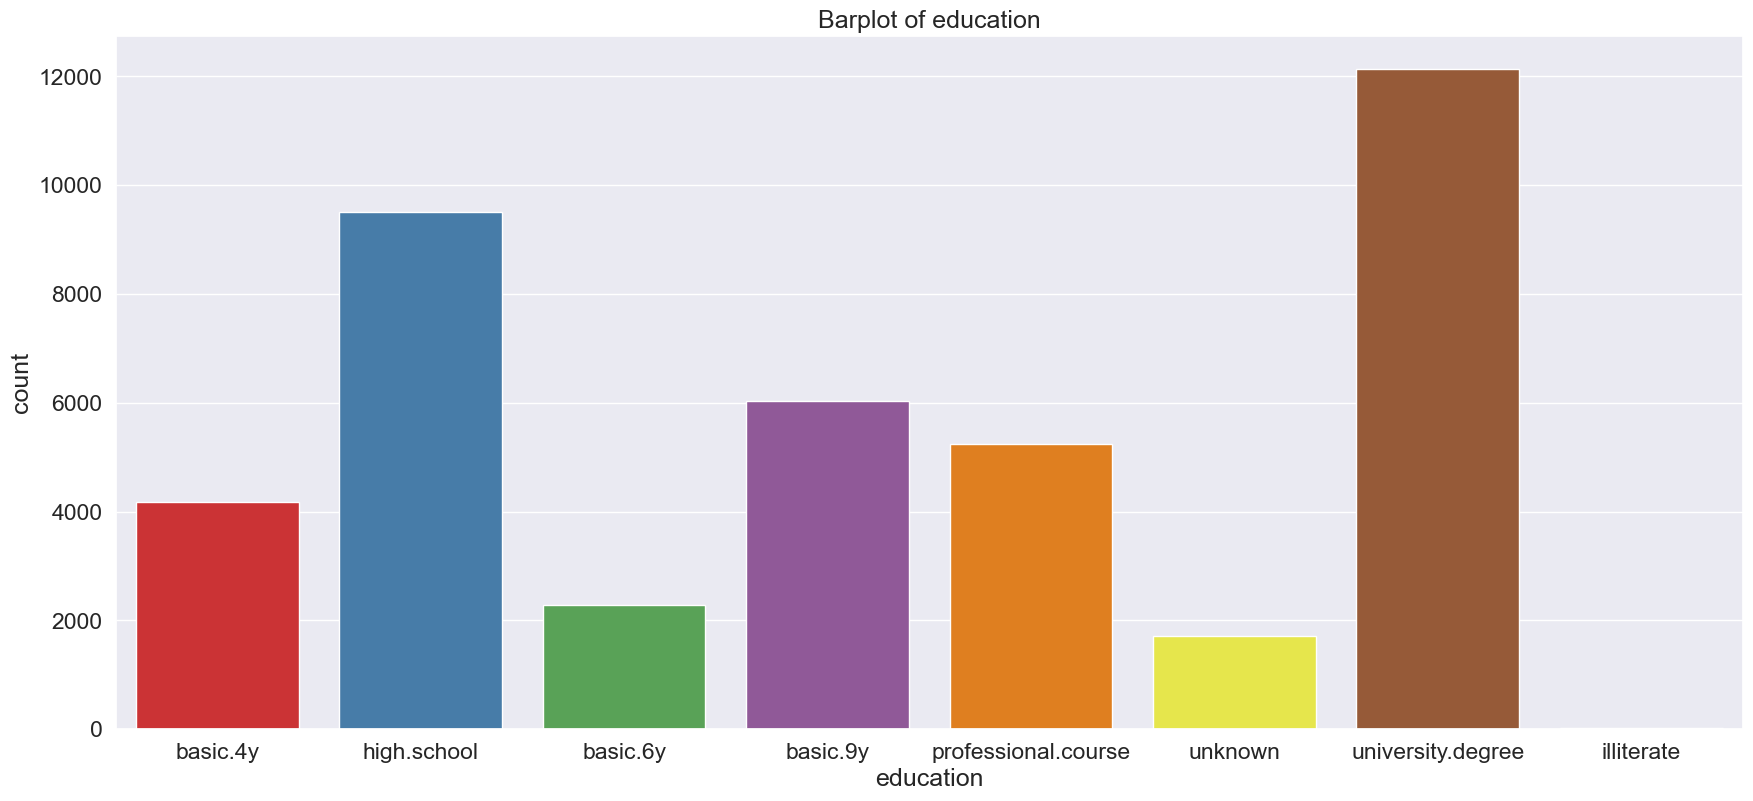

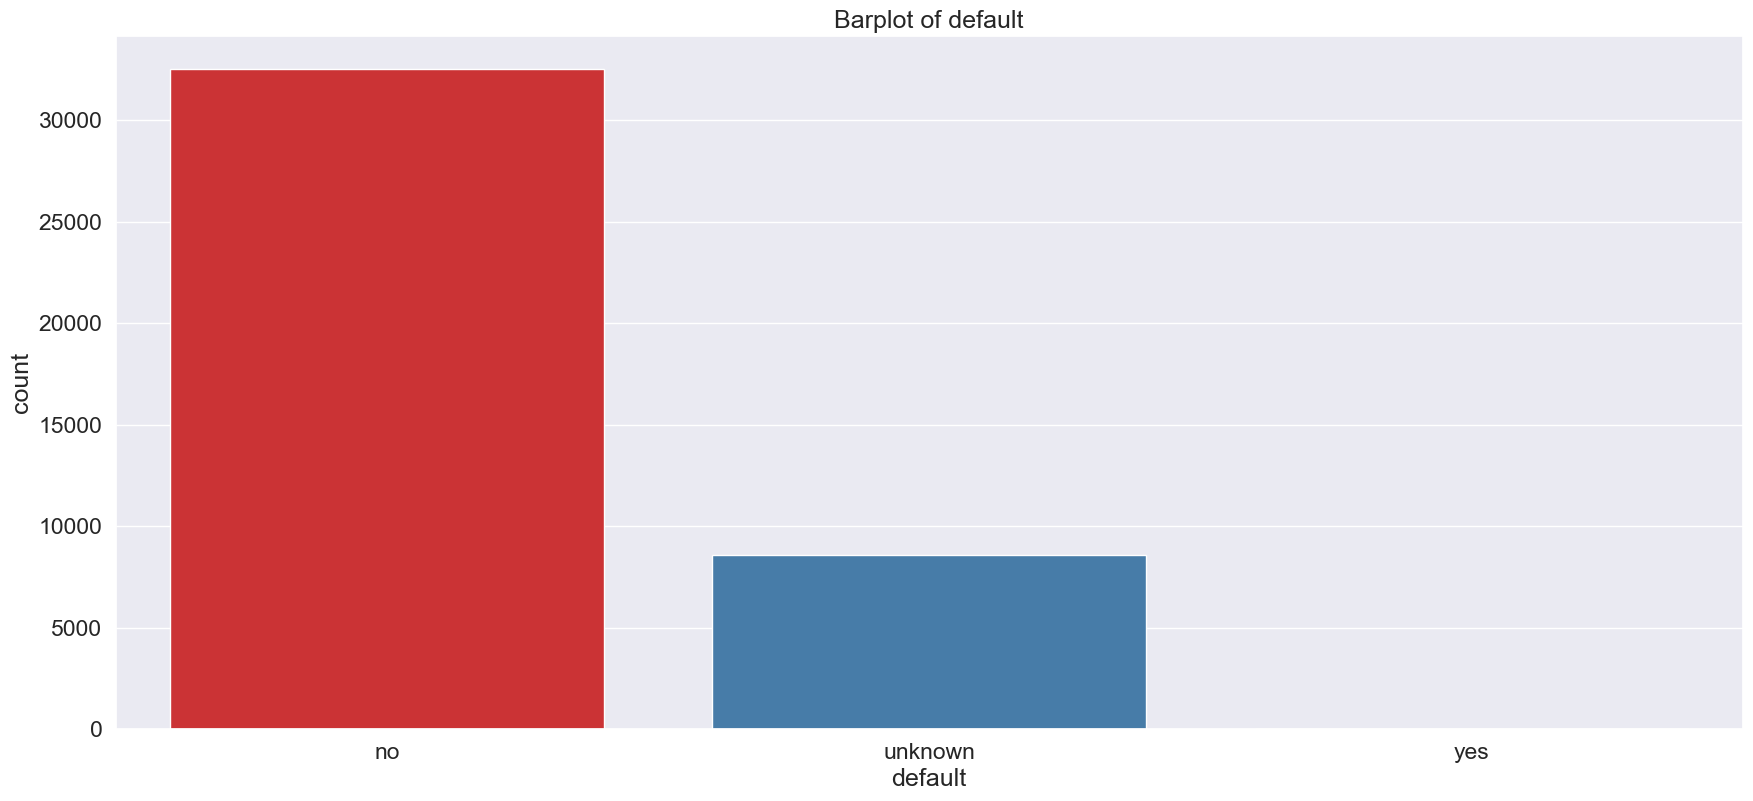

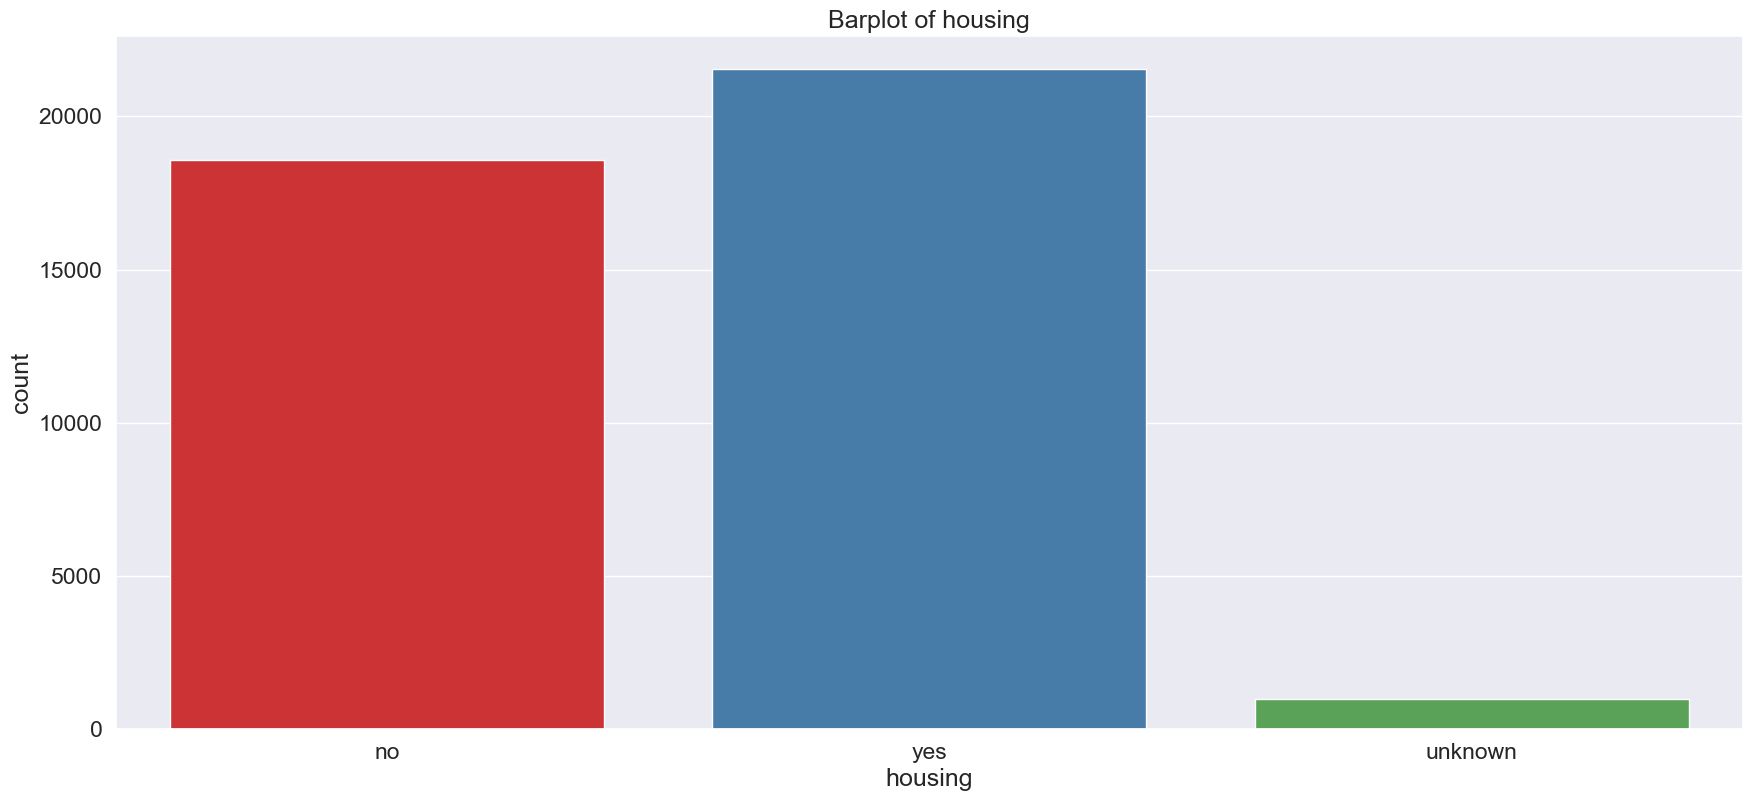

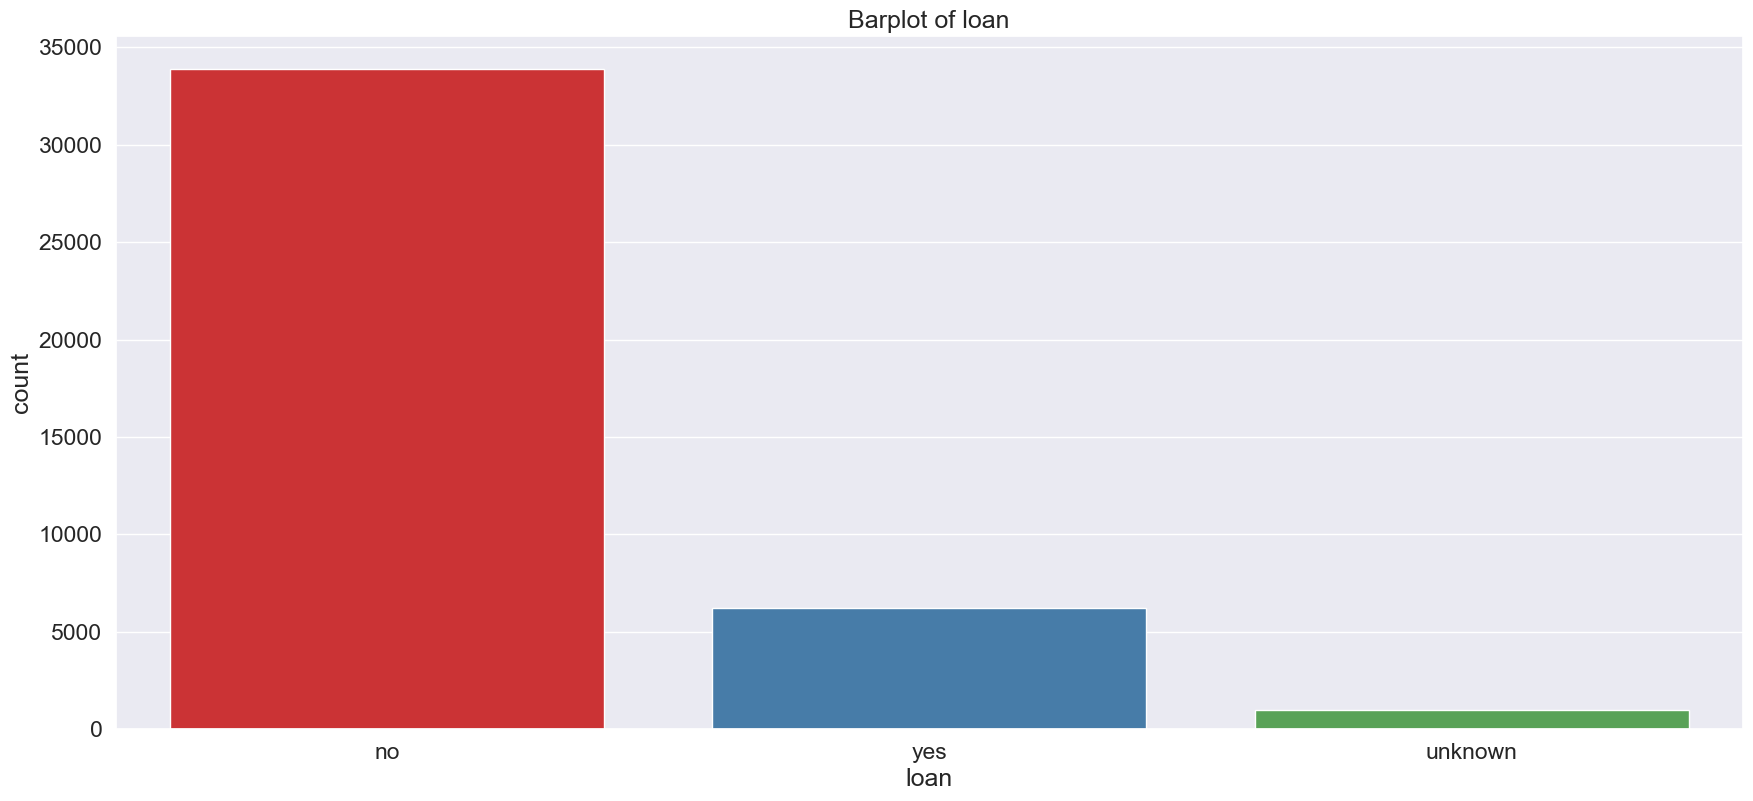

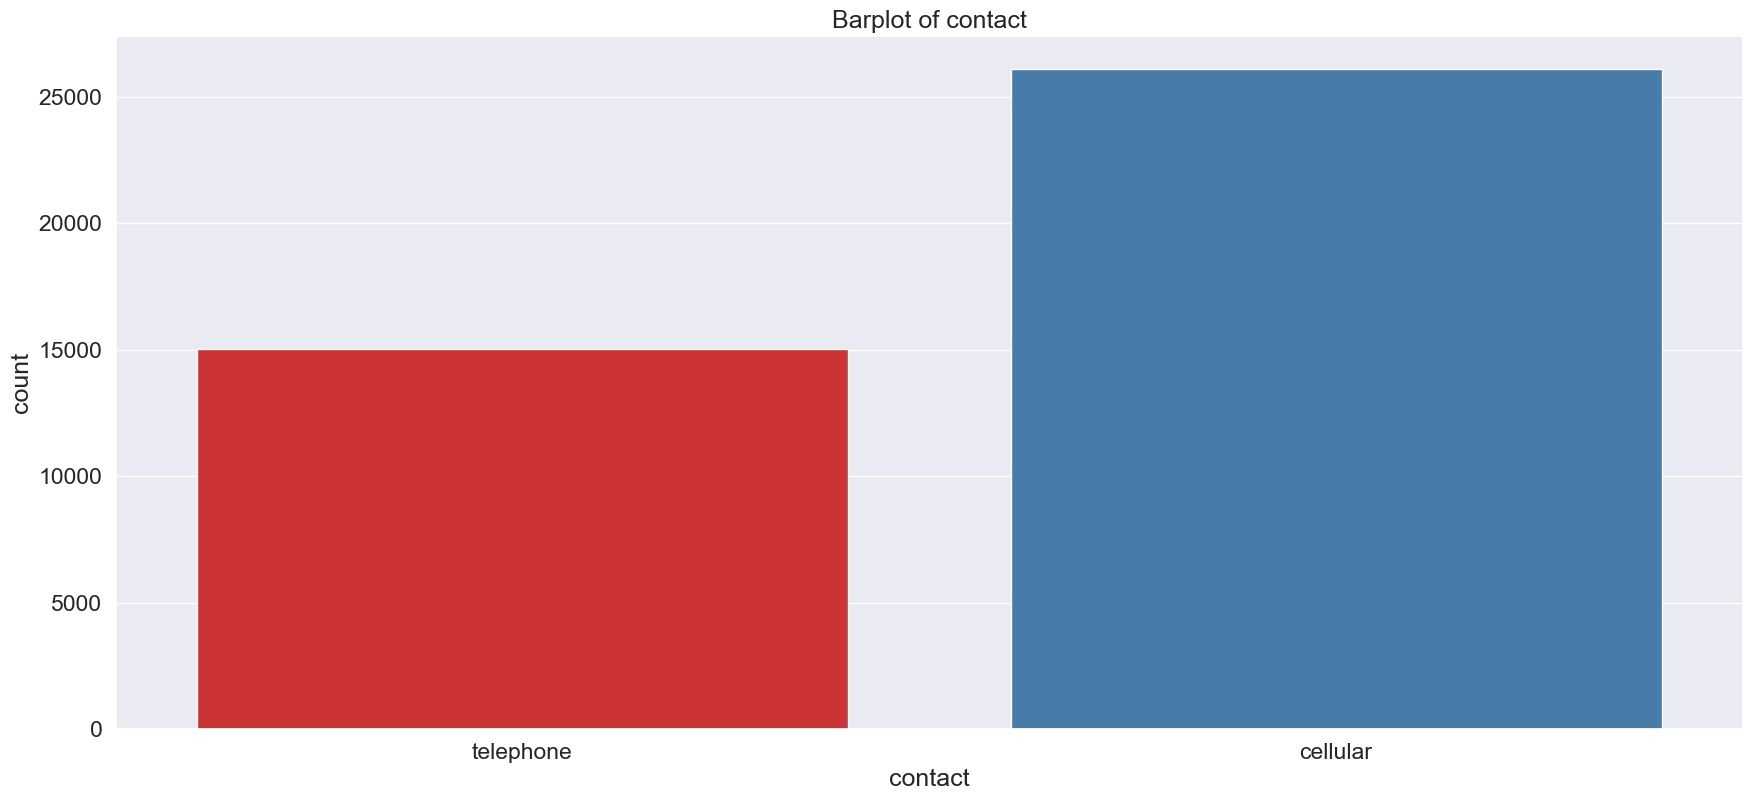

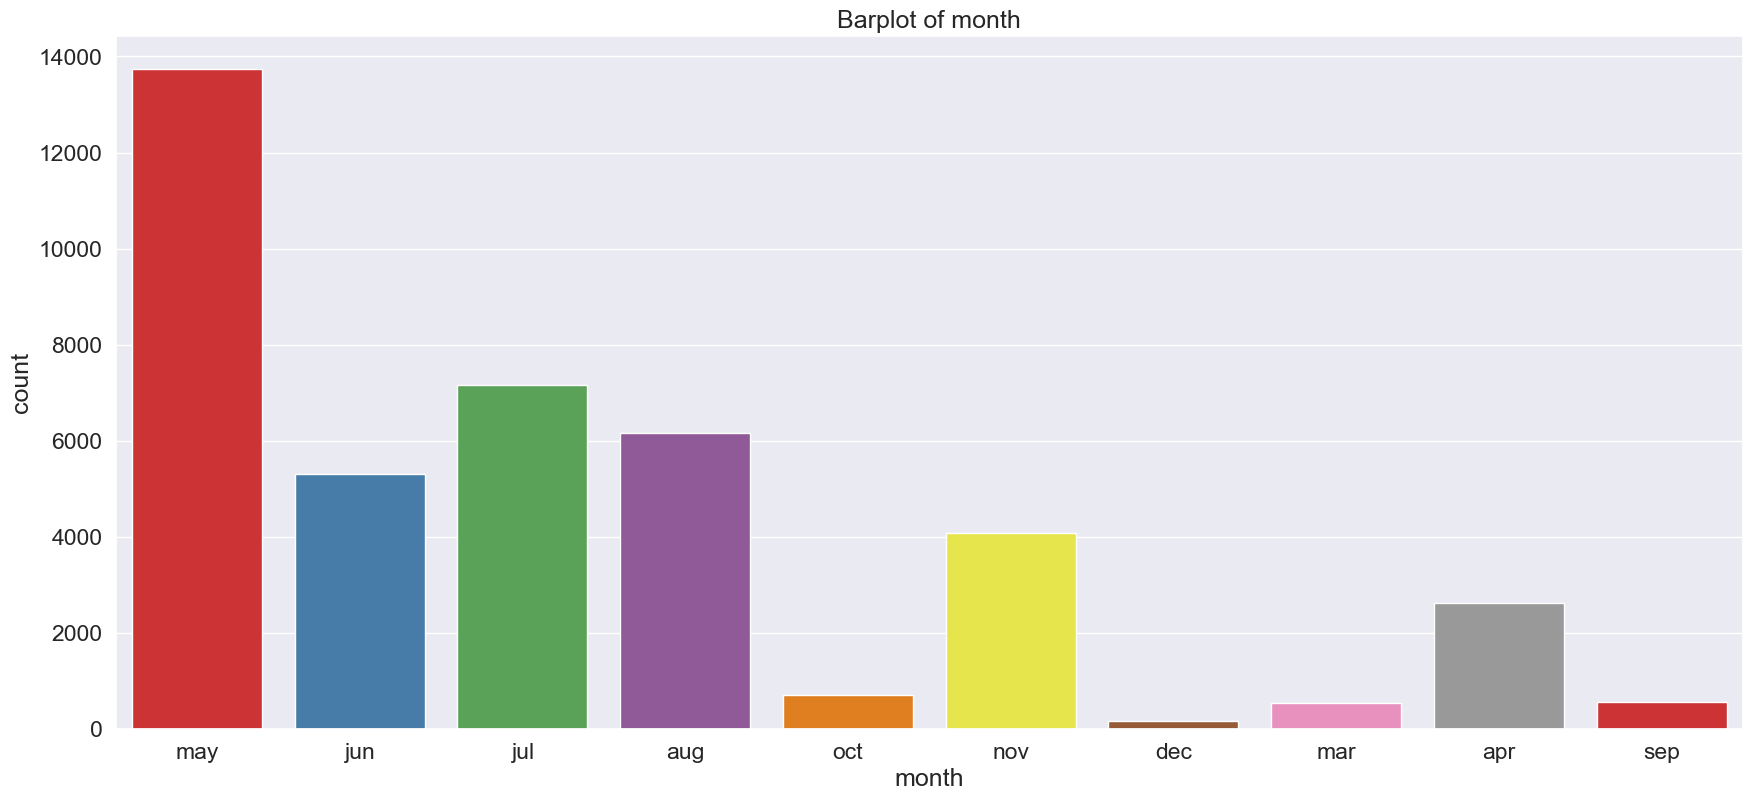

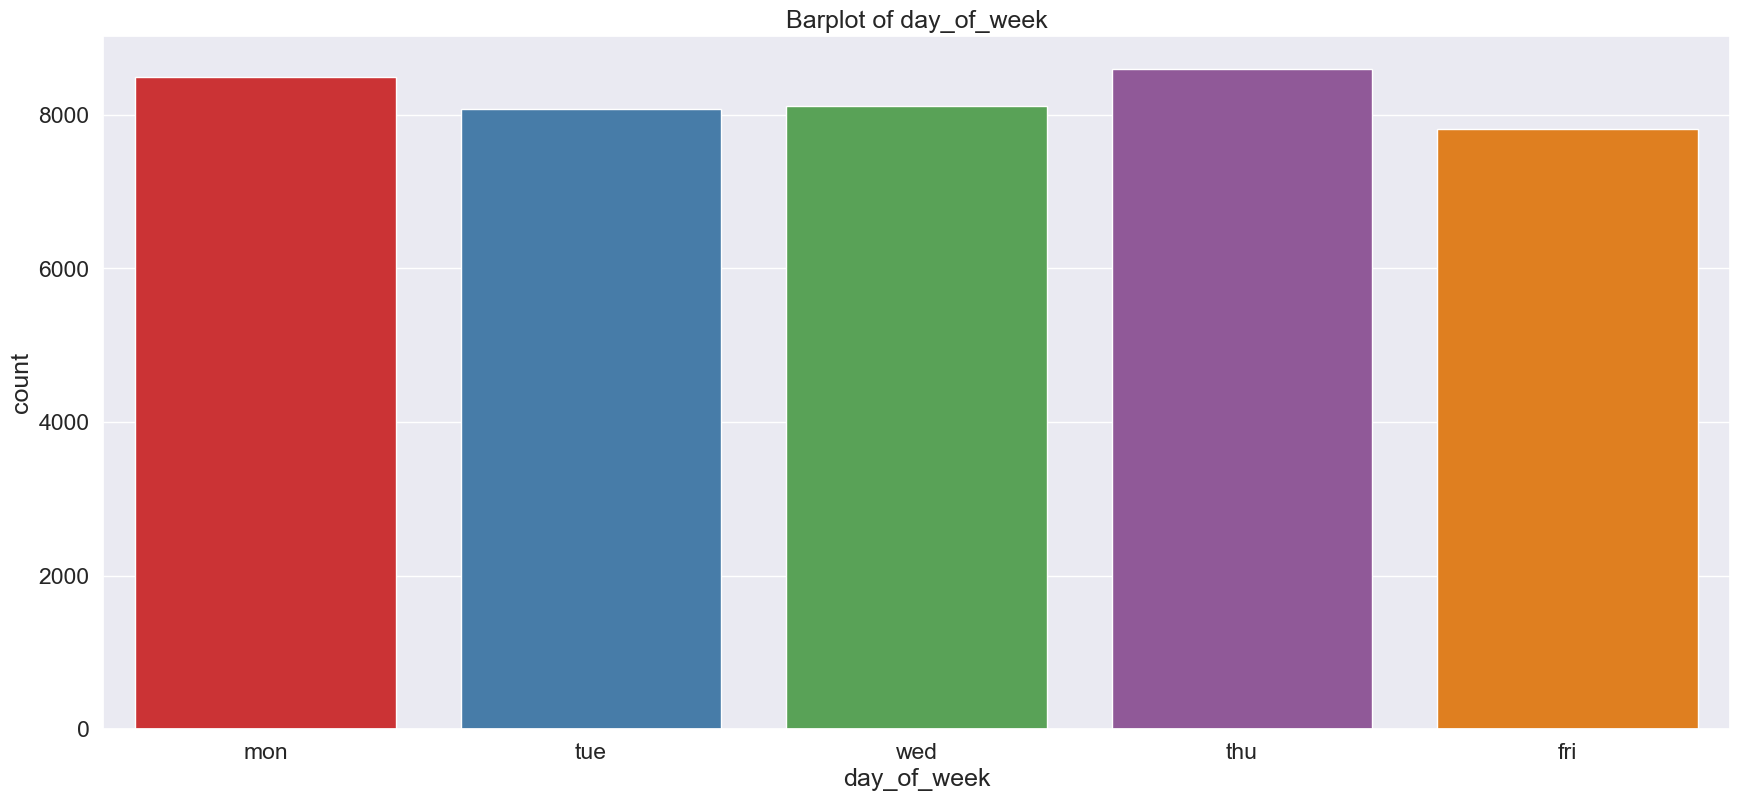

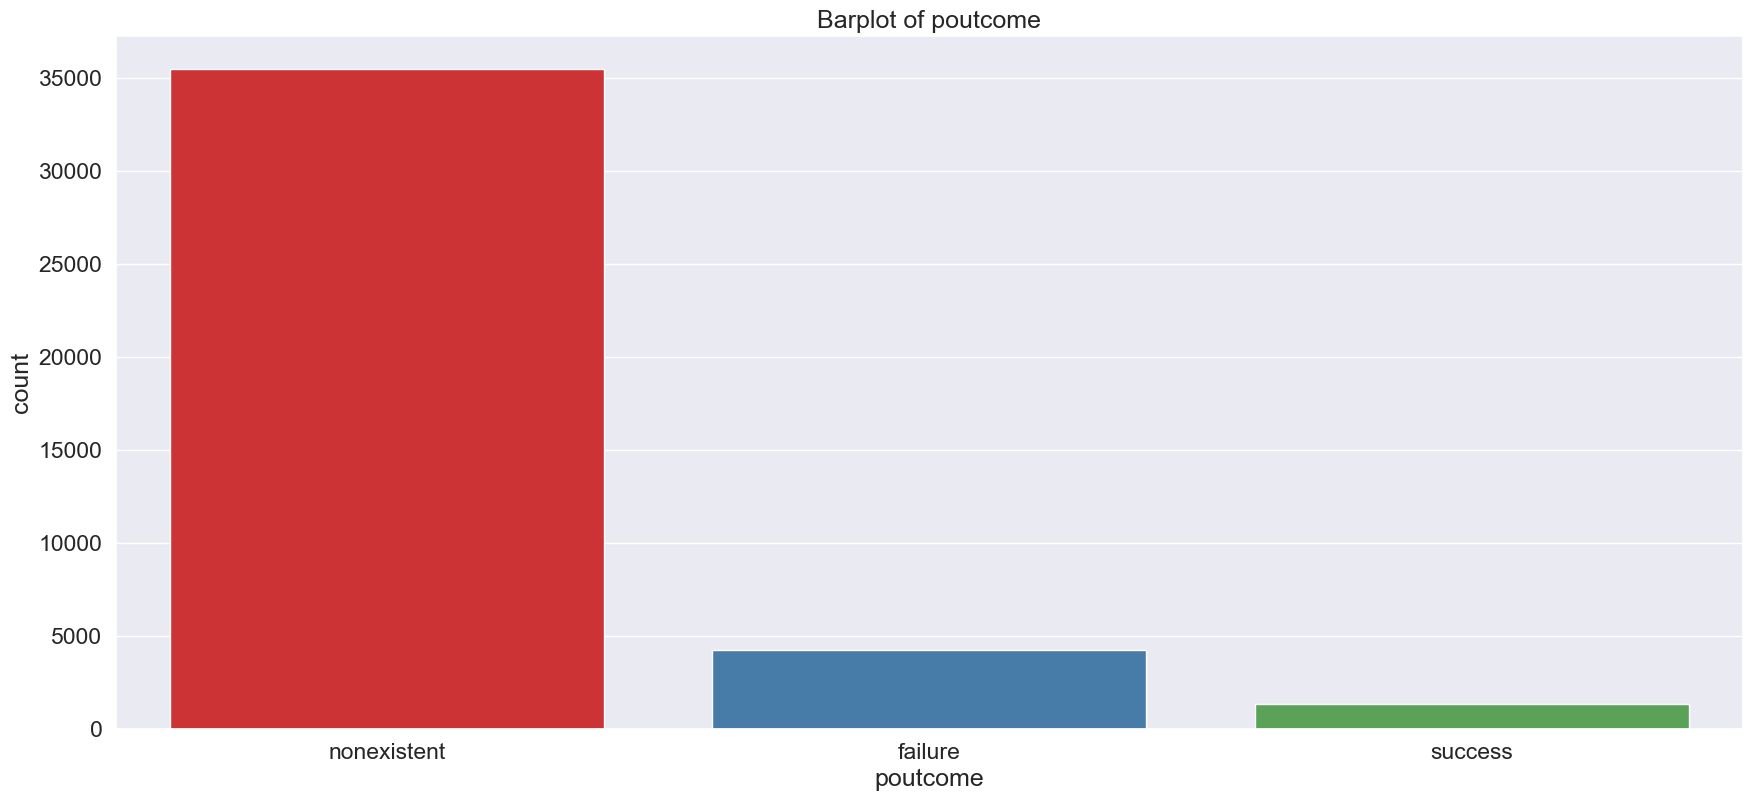

In [62]:
for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

# Categorical Features

Notice that the job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome columns are of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

In [63]:
#Create a list of element containing the string 'purpose, job,etc.'. Call this list cat_list.
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [64]:
new_df = pd.get_dummies(df, columns = cat_list)

In [65]:
data = new_df.dropna()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41096 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41096 non-null  int64  
 1   duration                       41096 non-null  int64  
 2   campaign                       41096 non-null  int64  
 3   pdays                          41096 non-null  int64  
 4   previous                       41096 non-null  int64  
 5   emp.var.rate                   41096 non-null  float64
 6   cons.price.idx                 41096 non-null  float64
 7   cons.conf.idx                  41096 non-null  float64
 8   euribor3m                      41096 non-null  float64
 9   nr.employed                    41096 non-null  float64
 10  y                              41096 non-null  int32  
 11  job_admin.                     41096 non-null  uint8  
 12  job_blue-collar                41096 non-null 

In [67]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [68]:
data.shape

(41096, 63)

# Relationship between duration and decision to sign up for the financial product

<Axes: title={'center': 'duration'}, xlabel='[y]'>

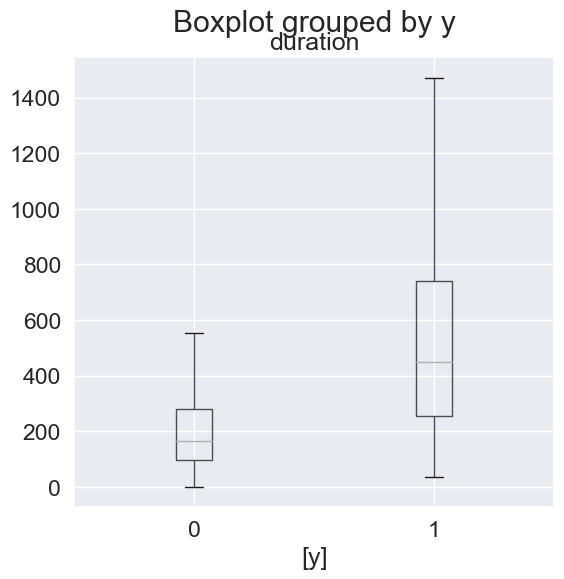

In [69]:
df[['duration', 'y']].boxplot(by=['y'], sym ='', figsize = [6, 6])

# Train Test Split
Now its time to split our data into a training set and a test set!
The 'y' variable is the one that we will try to predict.

In [70]:
# split the datasets into training and test data
X = data.drop('y', axis=1)
y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [71]:
X_train.shape

(28767, 62)

In [72]:
X_test.shape

(12329, 62)

In [73]:
y_train.shape

(28767,)

In [74]:
y_test.shape

(12329,)

In [75]:
#Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [76]:
def model_perf_v1(model,X_train, X_val, y_train, y_val):
    
    pred_dt = model.predict(X_val)
    print("Accuracy on training set:")
    pred = model.predict(X_train)
    print(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    #
    print("Accuracy on testing set:")
    accuracy = (metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    print(accuracy)
    #confusion matrix
    confusion_matrix_ =  pd.crosstab(index=y_val, columns=pred_dt.ravel(), rownames=['Expected'], colnames=['Predicted'])
    #visualization
    sns.heatmap(confusion_matrix_, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()
    #
    print("Recall:")
    recall = (metrics.recall_score(y_val,pred_dt))
    #recall_no = (metrics.recall_score(y_val,pred_dt))
    print(recall)
    #print(recall_no)
    # #
    print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    Specificity = (spec)
    print(Specificity)

    # #
    print("Precision:")
    Precision = (metrics.precision_score(y_val,pred_dt))
    print(Precision)
    # #
    print("Balanced Accuracy:")
    Balanced_Accuracy = (metrics.balanced_accuracy_score(y_val,pred_dt))
    print(Balanced_Accuracy)
    # #
    print("F1 score:")
    F1_score = (metrics.f1_score(y_val,pred_dt))
    print(F1_score)
    #classification_report
    # print(metrics.classification_report(y_test, pred_dt))
    return accuracy,recall,Specificity,Precision,F1_score,Balanced_Accuracy

In [77]:
def model_perf_to_lst(model,X_val, y_val):
    lst = [str(model)]
    pred_dt = model.predict(X_val)
    #print("Accuracy on testing set:")
    lst.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    #print("Recall:")
    lst.append(metrics.recall_score(y_val,pred_dt))
    #
    #print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    lst.append(spec)
    #
    #print("Precision:")
    lst.append(metrics.precision_score(y_val,pred_dt))
    #
    #print("Balanced Accuracy:")
    lst.append(metrics.balanced_accuracy_score(y_val,pred_dt))
    #
    #print("F1 score:")
    lst.append(metrics.f1_score(y_val,pred_dt))
    return lst

In [78]:
best_cl_normal = pd.DataFrame(columns = ['Model','Accuracy','Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 score'])

# Initiate all the classifier from the sklearn library. Keep all parameters with their default values. ( without specifing anything)
Following models will be created: Random Forest, Decision Tree, Logistic Regression, KNN, Naive Bayes, Gradient Boosting RBF classifiers.

Accuracy on training set:
1.0
Accuracy on testing set:
0.9137805174791143


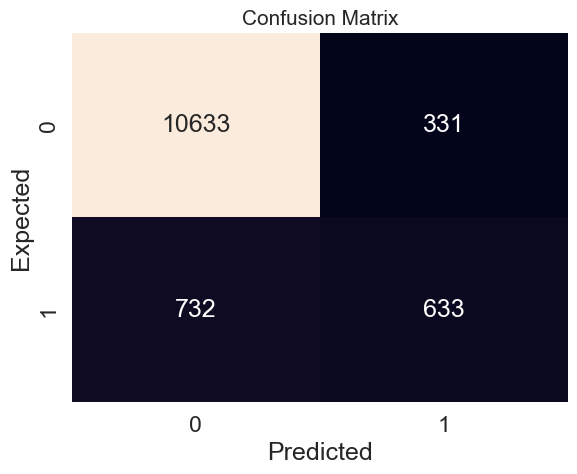

Recall:
0.46373626373626375
Specificity:
0.9698102882159796
Precision:
0.6566390041493776
Balanced Accuracy:
0.7167732759761216
F1 score:
0.5435809360240447


In [79]:
rf = RandomForestClassifier()
# fitting the model
rf.fit(X_train,y_train)
accuracy_rf, recall_rf, Specificity_rf, Precision_rf, F1_score_rf, Balanced_Accuracy_rf = model_perf_v1(rf,X_train,X_test,y_train,y_test)
rf_perf = model_perf_to_lst(rf, X_test, y_test) 

In [80]:
best_cl_normal.loc[len(best_cl_normal)] = rf_perf

Accuracy on training set:
1.0
Accuracy on testing set:
0.8977208208289399


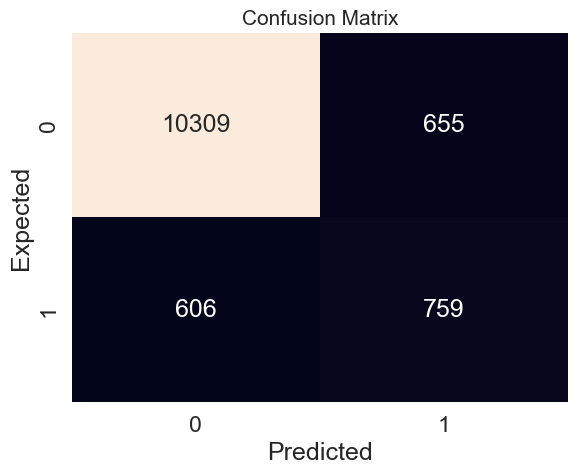

Recall:
0.5560439560439561
Specificity:
0.9402590295512586
Precision:
0.5367751060820368
Balanced Accuracy:
0.7481514927976074
F1 score:
0.5462396545519972


In [81]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt,recall_dt,Specificity_dt,Precision_dt,F1_score_dt,Balanced_Accuracy_dt = model_perf_v1(dt,X_train,X_test,y_train,y_test)
dt_perf = model_perf_to_lst(dt, X_test, y_test)

In [82]:
best_cl_normal.loc[len(best_cl_normal)] = dt_perf

Accuracy on training set:
0.9109396183126499
Accuracy on testing set:
0.911996106740206


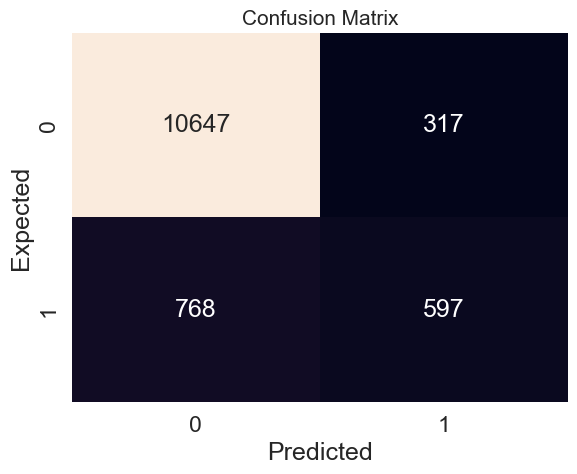

Recall:
0.43736263736263736
Specificity:
0.9710871944545786
Precision:
0.6531728665207878
Balanced Accuracy:
0.704224915908608
F1 score:
0.5239139973672663


In [83]:
log = LogisticRegression(max_iter=2500)

# fitting the model
log.fit(X_train, y_train)
accuracy_log, recall_log, Specificity_log, Precision_log, F1_score_log, Balanced_Accuracy_log = model_perf_v1(log,X_train,X_test,y_train,y_test)
log_perf = model_perf_to_lst(log, X_test, y_test)

In [84]:
best_cl_normal.loc[len(best_cl_normal)] = log_perf

Accuracy on training set:
0.9324225675252894
Accuracy on testing set:
0.8947197664044123


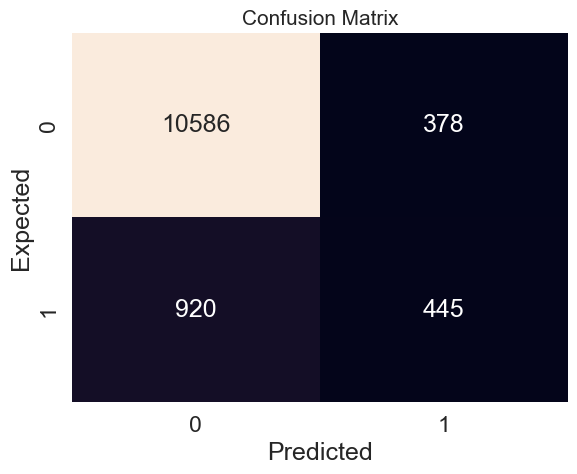

Recall:
0.326007326007326
Specificity:
0.9655235315578257
Precision:
0.5407047387606319
Balanced Accuracy:
0.6457654287825758
F1 score:
0.40676416819012795


In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)
accuracy_knn, recall_knn, Specificity_knn, Precision_knn, F1_score_knn, Balanced_Accuracy_knn = model_perf_v1(knn,X_train,X_test,y_train,y_test)
knn_perf = model_perf_to_lst(knn, X_test, y_test)

In [86]:
best_cl_normal.loc[len(best_cl_normal)] = knn_perf

Accuracy on training set:
0.7343136232488615
Accuracy on testing set:
0.7329061562170492


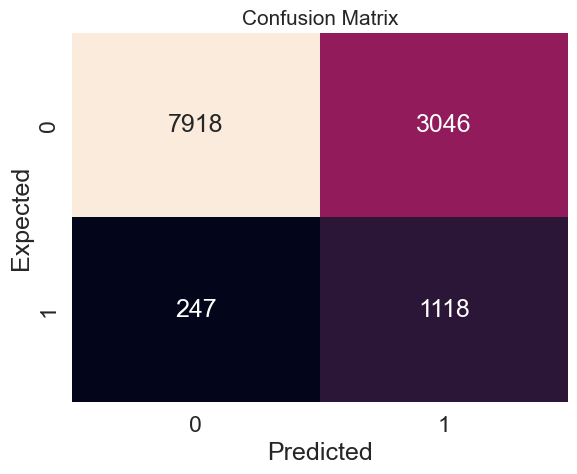

Recall:
0.819047619047619
Specificity:
0.722181685516235
Precision:
0.26849183477425553
Balanced Accuracy:
0.770614652281927
F1 score:
0.40441309459215047


In [87]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_gnb, recall_gnb, Specificity_gnb, Precision_gnb, F1_score_gnb, Balanced_Accuracy_gnb = model_perf_v1(gnb,X_train,X_test,y_train,y_test)
gnb_perf = model_perf_to_lst(gnb, X_test, y_test)

In [88]:
best_cl_normal.loc[len(best_cl_normal)] = gnb_perf

Accuracy on training set:
0.9220634755101331
Accuracy on testing set:
0.9182415443263849


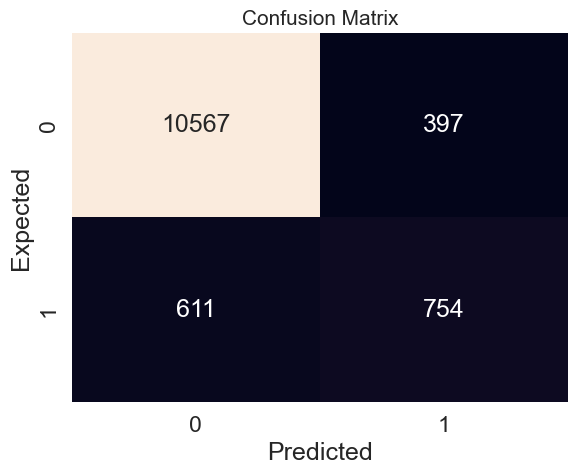

Recall:
0.5523809523809524
Specificity:
0.9637905873768697
Precision:
0.6550825369244135
Balanced Accuracy:
0.7580857698789111
F1 score:
0.5993640699523052


In [89]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
accuracy_grb, recall_grb, Specificity_grb, Precision_grb, F1_score_grb, Balanced_Accuracy_grb = model_perf_v1(grb,X_train,X_test,y_train,y_test)
grb_perf = model_perf_to_lst(grb, X_test, y_test)

In [90]:
best_cl_normal.loc[len(best_cl_normal)] = grb_perf

# Comparison table for default classifiers

In [91]:
best_cl_normal

,Model,Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1 score
0,RandomForestClassifier(),0.913781,0.463736,0.969810,0.656639,0.716773,0.543581
1,DecisionTreeClassifier(),0.897721,0.556044,0.940259,0.536775,0.748151,0.546240
2,LogisticRegression(max_iter=2500),0.911996,0.437363,0.971087,0.653173,0.704225,0.523914
3,KNeighborsClassifier(n_neighbors=3),0.894720,0.326007,0.965524,0.540705,0.645765,0.406764
4,GaussianNB(),0.732906,0.819048,0.722182,0.268492,0.770615,0.404413
5,GradientBoostingClassifier(),0.918242,0.552381,0.963791,0.655083,0.758086,0.599364


By looking at all the classifier model accuracy we found gradient boosting classifier without hyperparameter tunning give more information about target data.

# Performing grid search by hyperparameters tunning

In [93]:
# Helper function for grid search
def grid_search_helper():
    
    pipeline1 = Pipeline((
    ('clf', DecisionTreeClassifier()),
    ))

    pipeline2 = Pipeline((
    ('clf', LogisticRegression()),
    ))

    pipeline3 = Pipeline((
    ('clf', KNeighborsClassifier()),
    ))

    pipeline4 = Pipeline((
    ('clf', GaussianNB()),
    ))

    pipeline5 = Pipeline((
    ('clf', GradientBoostingClassifier()),
    ))

    parameters1 = {
    'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 
    'clf__max_depth': list(range(1,15))
    }

    parameters2 = {
    'clf__C': np.logspace(0, 4, 10)
     }
    
    parameters3 = {
    'clf__n_neighbors': [1,3,5,7,9,11,15]
    }

    parameters4 = {
    'clf__var_smoothing': np.logspace(0,-9)
    }
    
    parameters5 ={
    'clf__n_estimators':[1, 2, 5, 10, 20, 50],
    'clf__learning_rate':[0.1, 0.3, 0.5, 0.7, 1]
    }

    pars = [parameters1, parameters2, parameters3, parameters4, parameters5]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4, pipeline5]

    print("starting Gridsearch")
    dict_best_params ={}
    for i in range(len(pars)):
        print(pars[i])
        print(pips[i])
        gs = GridSearchCV(pips[i], pars[i], cv= 3, n_jobs=-1)
        gs.fit(X_train, y_train)
        print("finished Gridsearch\n")
        #print(gs.best_estimator_)
        dict_best_params[i]= gs.best_estimator_
    return dict_best_params

In [94]:
best_params_dict = grid_search_helper()

starting Gridsearch
{'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
Pipeline(steps=(('clf', DecisionTreeClassifier()),))
finished Gridsearch

{'clf__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])}
Pipeline(steps=(('clf', LogisticRegression()),))
finished Gridsearch

{'clf__n_neighbors': [1, 3, 5, 7, 9, 11, 15]}
Pipeline(steps=(('clf', KNeighborsClassifier()),))
finished Gridsearch

{'clf__var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-03, 7.54312006e-04, 4.94171336e-04, 3.23745754e-04,
       2.12095089e-04, 1.38

# Hyperparameter Tunning along with grid search for all the classifier

In [99]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
model_params = { 
     "svm": {
        'model': svm.SVC(gamma='auto'),
         'params': {
             'C': [1,10,20],
             'kernel': ['rbf','liner']
         }
     },

     "random_forest": {
        'model': RandomForestClassifier(),
         'params': {
             'n_estimators': [1,5,10],
         }
      },  

     "logistic_regression": {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params': {
             'C': [1,5,10],
           
         }
      },  
}

In [101]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\ut

In [103]:
final = pd.DataFrame(scores,columns=['model','best_score','best_params'])
final

,model,best_score,best_params
0,svm,0.907602,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.905621,{'n_estimators': 10}
2,logistic_regression,0.910348,{'C': 10}


According to the result we can predict the best model for the above project will be Logistic regression as best score for the logistic regression is 0.91% among all best.

# Create a report stating the performance of multiple models on this data and suggest the best model for production.

logistic Regression

# Report on Challenges faced

(1) Data Quality and Quantity:

Insufficient or poor-quality data can significantly impact the performance of machine learning models.
Imbalanced datasets may lead to biased or inaccurate predictions. Here in this data unknown values doing the same effect on data.
#Missing value 'job' variable: 330
#Missing value 'marital' variable: 80
#Missing value 'education' variable: 1730
#Missing value 'default' variable: 8596
#Missing value 'housing' variable: 990
#Missing value 'loan' variable: 990
#Missing value 'contact' variable: 0
#Missing value 'month' variable: 0
#Missing value 'day_of_week' variable: 0
#Missing value 'poutcome' variable: 0

(2) Feature Engineering:

Identifying and selecting relevant features is a crucial but challenging task. Dealing with high-dimensional data and extracting meaningful features can be complex. Here in this dataset out of 21 columns only some are relevant data other than that not useful according to requirement which effect the result of machine learning result.

(3) Model Selection and Hyperparameter Tuning:

Choosing the right algorithm for your specific problem and tuning its hyperparameters can be time-consuming.
Overfitting or underfitting may occur if the model is not appropriately tuned. here in this project time consuming for model selection and for hyperparameter is very high might.

(4) Interpretability and Explainability:

Understanding and interpreting the decisions made by complex machine learning models is often challenging. Explainability is crucial, especially in applications where model decisions impact human lives or have legal implications. here in this project related to financial occupancy so due to that very sensitive depending project.

(5) Computational Resources:

Training deep learning models can be computationally intensive and may require powerful hardware.Optimization of algorithms to run efficiently on available resources is a common concern.

(6) Deployment and Integration:

Translating a trained model into a production-ready system can pose challenges.
Integrating machine learning solutions with existing workflows or applications may require additional effort.



# Conclusion

As we can see from the analysis there is enough information to predict customer behavior with high accuracy. Due to the unbalanced nature of the dataset, we need to pay attention to the minority class, i.e. call duration. here in this dataset age reliving depends some of the results which we can able to understand by using default classifiers, there was 70% bal. accuracy was achieved, after introducing the class weight, model improved by .10, with total accuracy 87%. Final model is LogisticRegression(C=1.0,classweight = balanced).